In [1]:
//%jsroot on

In [2]:
//Q = (ma/mB− 1 )Ea + (mb/mB+ 1 )Eb −2cos(theta)*sqrt(ma*mb*Ea*Eb)/mB
//15C+p->d+14C      a=15C A=p b=d  B=14C
//ma=15.0105993 mb=2.01410177811 mB=14.003241988 Ea=27 MeV Eb_Etheta
//Q0=+1.01

In [3]:
#define _bin  40
#define _15C 28.3
#define _H2offset +0.0
#define _thetaoffset -0.
#define _ntarget 6.5e20

In [4]:
  TGraph *grate=new TGraph();
  TGraph *grate2=new TGraph();
  TGraph *grate_6100=new TGraph();
  TGraph *grate2_1=new TGraph();
  TGraph *grate_7000=new TGraph();
  TGraph *grate2_2=new TGraph();
  TGraph *grate2_all=new TGraph();
  TGraph *grate_mix=new TGraph();
Double_t ttemptheta[200],ttemprate[200];
Double_t temptheta,temprate,taa;
Int_t countrate=0,countrate_6100=0,countrate_7000=0,countline=0;
ifstream inr("/home/zhuhy/JNBook/Experiment2022/taf/else/txt/nbo15C_p_d_cm_0_KD02_Daehnick.txt");
  if(inr.is_open()){
    while(!inr.eof())
    {
      inr>>temptheta>>temprate>>taa;
      ttemptheta[countline]=temptheta;
      ttemprate[countline++]=temprate;
      //cout<<therunnumber<<'\t'<<accpttedrate[therunnumber]<<'\n';
    }
  }
  inr.close();


for(Int_t ii=0;ii<=180;ii++){
    //grate->SetPoint(ii,ii,ttemprate[ii]);
 /*
angle_cm_left_0[0]=162.54;  angle_cm_right_0[0]=168.39;
angle_cm_left_0[1]=154.35;  angle_cm_right_0[1]=162.54;
angle_cm_left_0[2]=147.87;  angle_cm_right_0[2]=154.35;
angle_cm_left_0[3]=135;     angle_cm_right_0[3]=147.87;
angle_cm_left_0[4]=117.72;  angle_cm_right_0[4]=135;
angle_cm_left_0[5]=105.21;  angle_cm_right_0[5]=117.72;
 */
     if(ii==0||ii==180)grate->SetPoint(ii,ii,ttemprate[ii]);
    else if(ii==1||ii==179)grate->SetPoint(ii,ii,(ttemprate[ii-1]+ttemprate[ii]+ttemprate[ii+1])/3.);
    else if(ii==2||ii==178)grate->SetPoint(ii,ii,(ttemprate[ii-2]+ttemprate[ii-1]+ttemprate[ii]+ttemprate[ii+1]+ttemprate[ii+2])/5.);
    else if((ii>2&ii<=18)||(ii>26&ii<=32))grate->SetPoint(ii,ii,(ttemprate[ii-3]+ttemprate[ii-2]+ttemprate[ii-1]+ttemprate[ii]+ttemprate[ii+1]+ttemprate[ii+2]+ttemprate[ii+3])/7.);
    else if((ii>18&&ii<=26)||(ii>32&&ii<=177))grate->SetPoint(ii,ii,(ttemprate[ii-5]+ttemprate[ii-4]+ttemprate[ii-3]+ttemprate[ii-2]+ttemprate[ii-1]+ttemprate[ii]+ttemprate[ii+1]+ttemprate[ii+2]+ttemprate[ii+3]+ttemprate[ii+4]+ttemprate[ii+5])/11.);
/*
    
angle_cm_left_0[0]=165.69;  angle_cm_right_0[0]=168.39;
angle_cm_left_0[1]=162.54;  angle_cm_right_0[1]=165.69;
angle_cm_left_0[2]=158.49;  angle_cm_right_0[2]=162.54;
angle_cm_left_0[3]=154.35;  angle_cm_right_0[3]=158.49;
angle_cm_left_0[4]=147.87;  angle_cm_right_0[4]=154.35;
angle_cm_left_0[5]=135;     angle_cm_right_0[5]=147.87;
angle_cm_left_0[6]=117.72;  angle_cm_right_0[6]=135;
    
    if(ii==0||ii==180)grate->SetPoint(ii,ii,ttemprate[ii]);
    else if(ii==1||ii==179)grate->SetPoint(ii,ii,(ttemprate[ii-1]+ttemprate[ii]+ttemprate[ii+1])/3.);
    else if(ii>1&ii<=26)grate->SetPoint(ii,ii,(ttemprate[ii-1]+ttemprate[ii]+ttemprate[ii+1])/3.);
    else if(ii>26&ii<=32)grate->SetPoint(ii,ii,(ttemprate[ii-3]+ttemprate[ii-2]+ttemprate[ii-1]+ttemprate[ii]+ttemprate[ii+1]+ttemprate[ii+2]+ttemprate[ii+3])/7.);
    else if(ii>32&&ii<=178)grate->SetPoint(ii,ii,(ttemprate[ii-5]+ttemprate[ii-4]+ttemprate[ii-3]+ttemprate[ii-2]+ttemprate[ii-1]+ttemprate[ii]+ttemprate[ii+1]+ttemprate[ii+2]+ttemprate[ii+3]+ttemprate[ii+4]+ttemprate[ii+5])/11.);  
  */  
    
}
ifstream inr2("/home/zhuhy/JNBook/Experiment2022/taf/else/txt/15C_p_d_cm_6100.txt");
  if(inr2.is_open()){
    while(!inr2.eof())
    {
      inr2>>temptheta>>temprate>>taa;
      grate_6100->SetPoint(countrate_6100++,temptheta,temprate);
      //cout<<therunnumber<<'\t'<<accpttedrate[therunnumber]<<'\n';
    }
  }
  inr2.close();

ifstream inr3("/home/zhuhy/JNBook/Experiment2022/taf/else/txt/15C_p_d_cm_7000.txt");
  if(inr3.is_open()){
    while(!inr3.eof())
    {
      inr3>>temptheta>>temprate>>taa;
      grate_7000->SetPoint(countrate_7000++,temptheta,temprate);
      //cout<<therunnumber<<'\t'<<accpttedrate[therunnumber]<<'\n';
    }
  }
  inr3.close();


In [5]:
Double_t mean[12],sigma[12],meanangle[12];
Double_t mean2[12],sigma2[12],meanangle2[12];
Double_t eoff[12]={0.9,0.9,0.9,0.9,   0.5,0.5,0.5,0.5,  0.5,0.5,0.5,0.5};
Double_t eoffx2[12]={0.002,0.,0.0020,0.002,   0.001,0.0005,0.003,0.0025,   0.0022,0.0015,0.003,0.0025};
//double eoff[12]={-1.5,-1.5,-1,-1, -1,-1,0,0, -1,-1,-1.5,-1.5};
Double_t theoff[12]={0.34,0.93,-0.5,-0.1,        -0.4,-0.7,0.5,-0.35,           1.2,1.44,0.8,0.95};
//double theoff[12]={0,0.5,0,0, -0.5,-0.5,0,-0.5, 1.,0,0.5,1.5};
TF1 *g1 = new TF1("g1","gaus");

In [6]:
Double_t anglemax_0=0,anglemax_6600=0;

Double_t Q,Ex,Theta;
Int_t i;
TGraph *T1Etheta_B14He3_0= new TGraph;
Double_t Ex_0=0;
  for(Theta=0;Theta<50;Theta=Theta+0.2){
    for(Ex=0;Ex<200;Ex=Ex+0.001){
    Q=1.01-((15.0106/14.003241988-1.)*(_15C*15)+(2.01410177811/14.003241988+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(15.0106*2.01410177811*_15C*15*Ex)/14.003241988);
        if(abs(Q-Ex_0)<0.01){
            T1Etheta_B14He3_0->SetPoint(i++,Theta,Ex);
            if(Theta>anglemax_0)anglemax_0=Theta;
        }
    }
  }


TGraph *T1Etheta_B14He3_6100= new TGraph;
Double_t Ex_6100=6.5;
  for(Theta=0;Theta<50;Theta=Theta+0.2){
    for(Ex=0;Ex<200;Ex=Ex+0.001){
    Q=1.01-((15.0106/14.003241988-1.)*(_15C*15)+(2.01410177811/14.003241988+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(15.0106*2.01410177811*_15C*15*Ex)/14.003241988);
        if(abs(Q-Ex_6100)<0.01){
            T1Etheta_B14He3_6100->SetPoint(i++,Theta,Ex);
            if(Theta>anglemax_6600)anglemax_6600=Theta;
        }
    }
  }
cout<<"anglemax_0="<<anglemax_0<<'\t'<<"anglemax_6600="<<anglemax_6600<<'\n';
TGraph *T1Etheta_B14He3_10000= new TGraph;
Double_t Ex_10000=11.4;
  for(Theta=0;Theta<50;Theta=Theta+0.2){
    for(Ex=0;Ex<200;Ex=Ex+0.001){
    Q=1.01-((15.0106/14.003241988-1.)*(_15C*15)+(2.01410177811/14.003241988+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(15.0106*2.01410177811*_15C*15*Ex)/14.003241988);
    //if(abs(Q-Ex_10000)<0.01)T1Etheta_B14He3_6100->SetPoint(i++,Theta,Ex);
    }
  }
/*
TGraph *T1Etheta_B14He3_1860= new TGraph;
Double_t Ex_1860=1.86;
  for(Theta=0;Theta<50;Theta=Theta+0.2){
    for(Ex=0;Ex<200;Ex=Ex+0.001){
    Q=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*Ex)/14.025404);
    if(abs(Q-Ex_1860)<0.01)T1Etheta_B14He3_1860->SetPoint(i++,Theta,Ex);
    }
  }

TGraph *T1Etheta_B14He3_4500= new TGraph;
Double_t Ex_4500=4.5;
  for(Theta=0;Theta<50;Theta=Theta+0.2){
    for(Ex=0;Ex<200;Ex=Ex+0.001){
    Q=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*Ex)/14.025404);
    if(abs(Q-Ex_4500)<0.01)T1Etheta_B14He3_4500->SetPoint(i++,Theta,Ex);
    }
  }
  */

Int_t ii0=0;

anglemax_0=44	anglemax_6600=37.4


In [7]:
TCanvas *c1=new TCanvas("c1","c1",1200,1500);
TCanvas *c2=new TCanvas("c2","c2");

In [8]:
TGraph *count_out_0= new TGraph;
TGraph *count_out_6900= new TGraph;
TGraph *solid_out_0= new TGraph;
TGraph *solid_out_6900= new TGraph;
TGraph *cross_out_0= new TGraph;
TGraph *cross_out_6900= new TGraph;
Int_t allcount_out_0=0,allcount_out_6900=0;
Int_t allsolid_out_0=0,allsolid_out_6900=0;
Int_t allcross_out_0=0,allcross_out_6900=0;
Int_t crosscount_out_0[50],crosscount_out_6900[50];
for(Int_t ii=0;ii<15;ii++){
    crosscount_out_0[ii]=0;
    crosscount_out_6900[ii]=0;
}

In [9]:
TGraph *T1E_newtheta_new_bydstar_0A= new TGraph;
TGraph *T1E_newtheta_new_bydstar_0B= new TGraph;
TGraph *T1E_newtheta_new_bydstar_1A= new TGraph;
TGraph *T1E_newtheta_new_bydstar_1B= new TGraph;
TGraph *T1E_newtheta_new_bydstar_2A= new TGraph;
TGraph *T1E_newtheta_new_bydstar_2B= new TGraph;
TGraph *T1E_newtheta_new_bydstar_3A= new TGraph;
TGraph *T1E_newtheta_new_bydstar_3B= new TGraph;
TGraph *T1E_newtheta_new_bydstar_4A= new TGraph;
TGraph *T1E_newtheta_new_bydstar_4B= new TGraph;
TGraph *T1E_newtheta_new_bydstar_5A= new TGraph;
TGraph *T1E_newtheta_new_bydstar_5B= new TGraph;
TGraph *T1E_newtheta_new_bydstar_all= new TGraph;
TGraph *T1E_newtheta_new_bydstar_all2= new TGraph;

In [10]:
TString fileName_0A = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_14C0_all_2H_taf_ad0_ac0A_theta_delay_tarloss.root");
TString fileName_0B = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_14C0_all_2H_taf_ad0_ac0B_theta_delay_tarloss.root");
TString fileName_1A = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_14C0_all_2H_taf_ad1_ac1A_theta_delay_tarloss.root");
TString fileName_1B = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_14C0_all_2H_taf_ad1_ac1B_theta_delay_tarloss.root");
TString fileName_2A = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_14C0_all_2H_taf_ad2_ac2A_theta_delay_tarloss.root");
TString fileName_2B = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_14C0_all_2H_taf_ad2_ac2B_theta_delay_tarloss.root");
TString fileName_3A = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_14C0_all_2H_taf_ad3_ac3A_theta_delay_tarloss.root");
TString fileName_3B = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_14C0_all_2H_taf_ad3_ac3B_theta_delay_tarloss.root");
TString fileName_4A = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_14C0_all_2H_taf_ad4_ac4A_theta_delay_tarloss.root");
TString fileName_4B = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_14C0_all_2H_taf_ad4_ac4A_theta_delay_tarloss.root");
TString fileName_5A = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_14C0_all_2H_taf_ad5_ac5A_theta_delay_tarloss.root");
TString fileName_5B = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/all_14C0_all_2H_taf_ad5_ac5B_theta_delay_tarloss.root");
TFile *ipf_0A = new TFile(fileName_0A.Data(),"read");
TFile *ipf_0B = new TFile(fileName_0B.Data(),"read");
TFile *ipf_1A = new TFile(fileName_1A.Data(),"read");
TFile *ipf_1B = new TFile(fileName_1B.Data(),"read");
TFile *ipf_2A = new TFile(fileName_2A.Data(),"read");
TFile *ipf_2B = new TFile(fileName_2B.Data(),"read");
TFile *ipf_3A = new TFile(fileName_3A.Data(),"read");
TFile *ipf_3B = new TFile(fileName_3B.Data(),"read");
TFile *ipf_4A = new TFile(fileName_4A.Data(),"read");
TFile *ipf_4B = new TFile(fileName_4B.Data(),"read");
TFile *ipf_5A = new TFile(fileName_5A.Data(),"read");
TFile *ipf_5B = new TFile(fileName_5B.Data(),"read");
TCanvas *T1Etheta_new_0A=(TCanvas *)ipf_0A->Get("T1Etheta_new");
TCanvas *T1Etheta_new_0B=(TCanvas *)ipf_0B->Get("T1Etheta_new");
TCanvas *T1Etheta_new_1A=(TCanvas *)ipf_1A->Get("T1Etheta_new");
TCanvas *T1Etheta_new_1B=(TCanvas *)ipf_1B->Get("T1Etheta_new");
TCanvas *T1Etheta_new_2A=(TCanvas *)ipf_2A->Get("T1Etheta_new");
TCanvas *T1Etheta_new_2B=(TCanvas *)ipf_2B->Get("T1Etheta_new");
TCanvas *T1Etheta_new_3A=(TCanvas *)ipf_3A->Get("T1Etheta_new");
TCanvas *T1Etheta_new_3B=(TCanvas *)ipf_3B->Get("T1Etheta_new");
TCanvas *T1Etheta_new_4A=(TCanvas *)ipf_4A->Get("T1Etheta_new");
TCanvas *T1Etheta_new_4B=(TCanvas *)ipf_4B->Get("T1Etheta_new");
TCanvas *T1Etheta_new_5A=(TCanvas *)ipf_5A->Get("T1Etheta_new");
TCanvas *T1Etheta_new_5B=(TCanvas *)ipf_5B->Get("T1Etheta_new");
TGraph *T1Etheta_new_bydstar_0A=(TGraph *)ipf_0A->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_0B=(TGraph *)ipf_0B->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_1A=(TGraph *)ipf_1A->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_1B=(TGraph *)ipf_1B->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_2A=(TGraph *)ipf_2A->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_2B=(TGraph *)ipf_2B->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_3A=(TGraph *)ipf_3A->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_3B=(TGraph *)ipf_3B->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_4A=(TGraph *)ipf_4A->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_4B=(TGraph *)ipf_4B->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_5A=(TGraph *)ipf_5A->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_5B=(TGraph *)ipf_5B->Get("T1Etheta_new_bydstar");




Int_t npoints_0A=T1Etheta_new_bydstar_0A->GetN();
Int_t npoints_0B=T1Etheta_new_bydstar_0B->GetN();
Int_t npoints_1A=T1Etheta_new_bydstar_1A->GetN();
Int_t npoints_1B=T1Etheta_new_bydstar_1B->GetN();
Int_t npoints_2A=T1Etheta_new_bydstar_2A->GetN();
Int_t npoints_2B=T1Etheta_new_bydstar_2B->GetN();
Int_t npoints_3A=T1Etheta_new_bydstar_3A->GetN();
Int_t npoints_3B=T1Etheta_new_bydstar_3B->GetN();
Int_t npoints_4A=T1Etheta_new_bydstar_4A->GetN();
Int_t npoints_4B=T1Etheta_new_bydstar_4B->GetN();
Int_t npoints_5A=T1Etheta_new_bydstar_5A->GetN();
Int_t npoints_5B=T1Etheta_new_bydstar_5B->GetN();
/*
npoints_0A=0;
npoints_1A=0;
npoints_2A=0;
npoints_3A=0;
npoints_4A=0;
npoints_5A=0;

npoints_0B=0;
npoints_1B=0;
npoints_2B=0;
npoints_3B=0;
npoints_4B=0;
npoints_5B=0;
*/

Double_t *Eb_0A=T1Etheta_new_bydstar_0A->GetY();
Double_t *Eb_0B=T1Etheta_new_bydstar_0B->GetY();
Double_t *Eb_1A=T1Etheta_new_bydstar_1A->GetY();
Double_t *Eb_1B=T1Etheta_new_bydstar_1B->GetY();
Double_t *Eb_2A=T1Etheta_new_bydstar_2A->GetY();
Double_t *Eb_2B=T1Etheta_new_bydstar_2B->GetY();
Double_t *Eb_3A=T1Etheta_new_bydstar_3A->GetY();
Double_t *Eb_3B=T1Etheta_new_bydstar_3B->GetY();
Double_t *Eb_4A=T1Etheta_new_bydstar_4A->GetY();
Double_t *Eb_4B=T1Etheta_new_bydstar_4B->GetY();
Double_t *Eb_5A=T1Etheta_new_bydstar_5A->GetY();
Double_t *Eb_5B=T1Etheta_new_bydstar_5B->GetY();
Double_t *theta_0A=T1Etheta_new_bydstar_0A->GetX();
Double_t *theta_0B=T1Etheta_new_bydstar_0B->GetX();
Double_t *theta_1A=T1Etheta_new_bydstar_1A->GetX();
Double_t *theta_1B=T1Etheta_new_bydstar_1B->GetX();
Double_t *theta_2A=T1Etheta_new_bydstar_2A->GetX();
Double_t *theta_2B=T1Etheta_new_bydstar_2B->GetX();
Double_t *theta_3A=T1Etheta_new_bydstar_3A->GetX();
Double_t *theta_3B=T1Etheta_new_bydstar_3B->GetX();
Double_t *theta_4A=T1Etheta_new_bydstar_4A->GetX();
Double_t *theta_4B=T1Etheta_new_bydstar_4B->GetX();
Double_t *theta_5A=T1Etheta_new_bydstar_5A->GetX();
Double_t *theta_5B=T1Etheta_new_bydstar_5B->GetX();

In [11]:
/*
c1->Clear();
T1Etheta_new_bydstar_a->Draw("ap");
T1Etheta_B14He3_0->SetMarkerColor(2);
T1Etheta_B14He3_6100->SetMarkerColor(2);
T1Etheta_B14He3_0->Draw("samep");
T1Etheta_B14He3_6100->Draw("samep");
c1->Draw();
*/
//Q = (ma/mB− 1 )Ea + (mb/mB+ 1 )Eb −2cos(theta)*sqrt(ma*mb*Ea*Eb)/mB
//15C(d,3He)14B Q=-15.19
//15C+d->3He+14B      a=15C A=d b=3He  B=14B
//ma=15.0105993 mb=3.01602932265 mB=14.025404 Ea=27 MeV Eb_Etheta

In [12]:
TFile *udead=new TFile("/home/zhuhy/JNBook/Experiment2022/taf/Q/15C_p_d_1314C/root/hit_7000.root");
//                       /home/zhuhy/JNBook/Experiment2022/taf/Q/else/hit.root");
TTree *tudead=(TTree*) udead->Get("tree");

In [13]:

TH1D *q_0A=new TH1D("Ex_0A","Ex_0A",_bin*2,-20,20); 
TH1D *q_0B=new TH1D("Ex_0B","Ex_0B",_bin*2,-20,20); 
TH1D *q_1A=new TH1D("Ex_1A","Ex_1A",_bin*2,-20,20); 
TH1D *q_1B=new TH1D("Ex_1B","Ex_1B",_bin*2,-20,20); 
TH1D *q_2A=new TH1D("Ex_2A","Ex_2A",_bin*2,-20,20); 
TH1D *q_2B=new TH1D("Ex_2B","Ex_2B",_bin*2,-20,20); 
TH1D *q_3A=new TH1D("Ex_3A","Ex_3A",_bin*2,-20,20); 
TH1D *q_3B=new TH1D("Ex_3B","Ex_3B",_bin*2,-20,20); 
TH1D *q_4A=new TH1D("Ex_4A","Ex_4A",_bin*2,-20,20); 
TH1D *q_4B=new TH1D("Ex_4B","Ex_4B",_bin*2,-20,20); 
TH1D *q_5A=new TH1D("Ex_5A","Ex_5A",_bin*2,-20,20); 
TH1D *q_5B=new TH1D("Ex_5B","Ex_5B",_bin*2,-20,20); 
TH1D *t_0A=new TH1D("An_0A","An_0A",_bin*2,-20,20); 
TH1D *t_0B=new TH1D("An_0B","An_0B",_bin*2,-20,20); 
TH1D *t_1A=new TH1D("An_1A","An_1A",_bin*2,-20,20); 
TH1D *t_1B=new TH1D("An_1B","An_1B",_bin*2,-20,20); 
TH1D *t_2A=new TH1D("An_2A","An_2A",_bin*2,-20,20); 
TH1D *t_2B=new TH1D("An_2B","An_2B",_bin*2,-20,20); 
TH1D *t_3A=new TH1D("An_3A","An_3A",_bin*2,-20,20); 
TH1D *t_3B=new TH1D("An_3B","An_3B",_bin*2,-20,20); 
TH1D *t_4A=new TH1D("An_4A","An_4A",_bin*2,-20,20); 
TH1D *t_4B=new TH1D("An_4B","An_4B",_bin*2,-20,20); 
TH1D *t_5A=new TH1D("An_5A","An_5A",_bin*2,-20,20); 
TH1D *t_5B=new TH1D("An_5B","An_5B",_bin*2,-20,20); 
Double_t Q_0A[50000];
Double_t Q_0B[50000];
Double_t Q_1A[50000];
Double_t Q_1B[50000];
Double_t Q_2A[50000];
Double_t Q_2B[50000];
Double_t Q_3A[50000];
Double_t Q_3B[50000];
Double_t Q_4A[50000];
Double_t Q_4B[50000];
Double_t Q_5A[50000];
Double_t Q_5B[50000];
for(Int_t i=0;i<50000;i++)Q_0A[i]=-999;
for(Int_t i=0;i<50000;i++)Q_0B[i]=-999;
for(Int_t i=0;i<50000;i++)Q_1A[i]=-999;
for(Int_t i=0;i<50000;i++)Q_1B[i]=-999;
for(Int_t i=0;i<50000;i++)Q_2A[i]=-999;
for(Int_t i=0;i<50000;i++)Q_2B[i]=-999;
for(Int_t i=0;i<50000;i++)Q_3A[i]=-999;
for(Int_t i=0;i<50000;i++)Q_3B[i]=-999;
for(Int_t i=0;i<50000;i++)Q_4A[i]=-999;
for(Int_t i=0;i<50000;i++)Q_4B[i]=-999;
for(Int_t i=0;i<50000;i++)Q_5A[i]=-999;
for(Int_t i=0;i<50000;i++)Q_5B[i]=-999;
Int_t count_all=0;
//ad0
ii0=0;
Int_t theangle=0;

Double_t meanQ_6900=6.6,deltaQ_6900=3.9;
Double_t meanQ_0=0,deltaQ_0=3;
Double_t q_maxE=25.;
Double_t q_maxE_6900=30.;
Double_t q_maxE_0=30.;
Int_t anglebin_0=3;
Int_t anglebin_6900=3;
Int_t anglehigh_0=46,anglelow_0=22;
Int_t anglehigh_6900=46,anglelow_6900=22;

   Int_t thetafsolidangle_0[15];
   Int_t thetafsolidangle_6900[15];
   Double_t thetafangle;

TH1D *q_all=new TH1D("Ex_all","Ex_all",_bin*2,-20,20); 
TH1D *q_cut_0[50];
TString name_q_cut;
for(Int_t ii=0;ii<50;ii++){
    name_q_cut= TString::Format("%d - %d",anglelow_0+ii*anglebin_0,anglelow_0+(ii+1)*anglebin_0);
    q_cut_0[ii]=new TH1D(name_q_cut.Data(),name_q_cut.Data(),_bin*2,-20,20); 
}


   //TBranch *b_tafangle;
   for(Int_t ii=0;ii<15;ii++){thetafsolidangle_0[ii]=0;thetafsolidangle_6900[ii]=0;}
   tudead->SetBranchAddress("tafangle", &thetafangle);

   Long64_t nentries = tudead->GetEntries();
   for (Long64_t jentry=1; jentry<nentries;jentry++) {
      //Long64_t ientry05 = LoadTree(jentry05);
      tudead->GetEntry(jentry);
      theangle=((Int_t)(thetafangle-anglelow_6900))/anglebin_6900;
      if(theangle>=0&&theangle<=(anglehigh_6900-anglelow_6900)/anglebin_6900){
            thetafsolidangle_6900[theangle]++;
      }
      theangle=((Int_t)(thetafangle-anglelow_0))/anglebin_0;
      if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            thetafsolidangle_0[theangle]++;
      }
   }






for(Int_t i=0;i<npoints_0A;i++){
    Q_0A[i]=1.01-((15.0106/14.003241988-1.)*(_15C*15)+(2.01410177811/14.003241988+1.)*(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i])
    -2.*cos((theta_0A[i]+theoff[0])*3.14159/180.)*sqrt(15.0106*2.01410177811*_15C*15*(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i]))/14.003241988); 
    if(abs(Q_0A[i]-5)<=10&&(Eb_0A[i]+_H2offset)<q_maxE){
    q_0A->Fill(Q_0A[i]);
    q_all->Fill(Q_0A[i]);
    t_0A->Fill(Q_0A[i]);
    }
    //if(abs((theta_0A[i]+theoff[0])-33)<=16&&(Eb_0A[i]+_H2offset)<60)
    if(abs(Q_0A[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i])-100)<99){
    T1E_newtheta_new_bydstar_0A->SetPoint(ii0++,theta_0A[i]+theoff[0],(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_0A[i]+theoff[0],(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,theta_0A[i]+theoff[0],Q_0A[i]);
    }
    if(abs(Q_0A[i]-meanQ_6900)<=deltaQ_6900&&(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i])<q_maxE_6900){
        theangle=((Int_t)(theta_0A[i]+theoff[0]-anglelow_6900))/anglebin_6900;
        if(theangle>=0&&theangle<=(anglehigh_6900-anglelow_6900)/anglebin_6900){
            crosscount_out_6900[theangle]++;
        }
    }
    if(abs(Q_0A[i]-meanQ_0)<=deltaQ_0&&(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i])<q_maxE_0){
        theangle=((Int_t)(theta_0A[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_0A[i]);
        }
    }
}
ii0=0;
for(Int_t i=0;i<npoints_0B;i++){
    Q_0B[i]=1.01-((15.0106/14.003241988-1.)*(_15C*15)+(2.01410177811/14.003241988+1.)*(Eb_0B[i]+eoff[1]-eoffx2[1]*Eb_0B[i]*Eb_0B[i])
    -2.*cos((theta_0B[i]+theoff[1])*3.14159/180.)*sqrt(15.0106*2.01410177811*_15C*15*(Eb_0B[i]+eoff[1]-eoffx2[1]*Eb_0B[i]*Eb_0B[i]))/14.003241988);
    if(abs(Q_0B[i]-5)<=10&&(Eb_0B[i]+_H2offset)<q_maxE){
    q_0B->Fill(Q_0B[i]);
    q_all->Fill(Q_0B[i]);
    t_0B->Fill(Q_0B[i]);
    }
    //if(abs((theta_0B[i]+theoff[1])-33)<=16&&(Eb_0B[i]+_H2offset)<60)
    if(abs(Q_0B[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_0B[i]+eoff[1]-eoffx2[1]*Eb_0B[i]*Eb_0B[i])-100)<99){
    T1E_newtheta_new_bydstar_0B->SetPoint(ii0++,theta_0B[i]+theoff[1],(Eb_0B[i]+eoff[1]-eoffx2[1]*Eb_0B[i]*Eb_0B[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_0B[i]+theoff[1],(Eb_0B[i]+eoff[1]-eoffx2[1]*Eb_0B[i]*Eb_0B[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,theta_0B[i]+theoff[0],Q_0B[i]);
    }
    if(abs(Q_0B[i]-meanQ_6900)<=deltaQ_6900&&(Eb_0B[i]+eoff[0]-eoffx2[0]*Eb_0B[i]*Eb_0B[i])<q_maxE_6900){
        theangle=((Int_t)(theta_0B[i]+theoff[0]-anglelow_6900))/anglebin_6900;
        if(theangle>=0&&theangle<=(anglehigh_6900-anglelow_6900)/anglebin_6900){
            crosscount_out_6900[theangle]++;
        }
    }
    if(abs(Q_0B[i]-meanQ_0)<=deltaQ_0&&(Eb_0B[i]+eoff[0]-eoffx2[0]*Eb_0B[i]*Eb_0B[i])<q_maxE_0){
        theangle=((Int_t)(theta_0B[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_0B[i]);
        }
    }
}
ii0=0;
//ad1
for(Int_t i=0;i<npoints_1A;i++){
    Q_1A[i]=1.01-((15.0106/14.003241988-1.)*(_15C*15)+(2.01410177811/14.003241988+1.)*(Eb_1A[i]+eoff[2]-eoffx2[2]*Eb_1A[i]*Eb_1A[i])
    -2.*cos((theta_1A[i]+theoff[2])*3.14159/180.)*sqrt(15.0106*2.01410177811*_15C*15*(Eb_1A[i]+eoff[2]-eoffx2[2]*Eb_1A[i]*Eb_1A[i]))/14.003241988);
    if(abs(Q_1A[i]-5)<=10&&(Eb_1A[i]+_H2offset)<q_maxE){
    q_1A->Fill(Q_1A[i]);
    q_all->Fill(Q_1A[i]);
    t_1A->Fill(Q_1A[i]);
    }
    //if(abs((theta_1A[i]+theoff[2])-33)<=16&&(Eb_1A[i]+_H2offset)<60)
    if(abs(Q_1A[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_1A[i]+eoff[2]-eoffx2[2]*Eb_1A[i]*Eb_1A[i])-100)<99){
    T1E_newtheta_new_bydstar_1A->SetPoint(ii0++,theta_1A[i]+theoff[2],(Eb_1A[i]+eoff[2]-eoffx2[2]*Eb_1A[i]*Eb_1A[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_1A[i]+theoff[2],(Eb_1A[i]+eoff[2]-eoffx2[2]*Eb_1A[i]*Eb_1A[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,theta_1A[i]+theoff[0],Q_1A[i]);
    }
    if(abs(Q_1A[i]-meanQ_6900)<=deltaQ_6900&&(Eb_1A[i]+eoff[0]-eoffx2[0]*Eb_1A[i]*Eb_1A[i])<q_maxE_6900){
        theangle=((Int_t)(theta_1A[i]+theoff[0]-anglelow_6900))/anglebin_6900;
        if(theangle>=0&&theangle<=(anglehigh_6900-anglelow_6900)/anglebin_6900){
            crosscount_out_6900[theangle]++;
        }
    }
    if(abs(Q_1A[i]-meanQ_0)<=deltaQ_0&&(Eb_1A[i]+eoff[0]-eoffx2[0]*Eb_1A[i]*Eb_1A[i])<q_maxE_0){
        theangle=((Int_t)(theta_1A[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_1A[i]);
        }
    }
}
ii0=0;
for(Int_t i=0;i<npoints_1B;i++){
    Q_1B[i]=1.01-((15.0106/14.003241988-1.)*(_15C*15)+(2.01410177811/14.003241988+1.)*(Eb_1B[i]+eoff[3]-eoffx2[3]*Eb_1B[i]*Eb_1B[i])
    -2.*cos((theta_1B[i]+theoff[3])*3.14159/180.)*sqrt(15.0106*2.01410177811*_15C*15*(Eb_1B[i]+eoff[3]-eoffx2[3]*Eb_1B[i]*Eb_1B[i]))/14.003241988);
    if(abs(Q_1B[i]-5)<=10&&(Eb_1B[i]+_H2offset)<q_maxE){
    q_1B->Fill(Q_1B[i]);
    q_all->Fill(Q_1B[i]);
    t_1B->Fill(Q_1B[i]);
    }
    //if(abs((theta_1B[i]+theoff[3])-33)<=16&&(Eb_1B[i]+_H2offset)<60)
    if(abs(Q_1B[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_1B[i]+eoff[3]-eoffx2[3]*Eb_1B[i]*Eb_1B[i])-100)<99){
    T1E_newtheta_new_bydstar_1B->SetPoint(ii0++,theta_1B[i]+theoff[3],(Eb_1B[i]+eoff[3]-eoffx2[3]*Eb_1B[i]*Eb_1B[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_1B[i]+theoff[3],(Eb_1B[i]+eoff[3]-eoffx2[3]*Eb_1B[i]*Eb_1B[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,theta_1A[i]+theoff[0],Q_1B[i]);
    }
    if(abs(Q_1B[i]-meanQ_6900)<=deltaQ_6900&&(Eb_1B[i]+eoff[0]-eoffx2[0]*Eb_1B[i]*Eb_1B[i])<q_maxE_6900){
        theangle=((Int_t)(theta_1B[i]+theoff[0]-anglelow_6900))/anglebin_6900;
        if(theangle>=0&&theangle<=(anglehigh_6900-anglelow_6900)/anglebin_6900){
            crosscount_out_6900[theangle]++;
        }
    }
    if(abs(Q_1B[i]-meanQ_0)<=deltaQ_0&&(Eb_1B[i]+eoff[0]-eoffx2[0]*Eb_1B[i]*Eb_1B[i])<q_maxE_0){
        theangle=((Int_t)(theta_1B[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_1B[i]);
        }
    }
}
ii0=0;
//ad2
for(Int_t i=0;i<npoints_2A;i++){
    Q_2A[i]=1.01-((15.0106/14.003241988-1.)*(_15C*15)+(2.01410177811/14.003241988+1.)*(Eb_2A[i]+eoff[4]-eoffx2[4]*Eb_2A[i]*Eb_2A[i])
    -2.*cos((theta_2A[i]+theoff[4])*3.14159/180.)*sqrt(15.0106*2.01410177811*_15C*15*(Eb_2A[i]+eoff[4]-eoffx2[4]*Eb_2A[i]*Eb_2A[i]))/14.003241988);
    if(abs(Q_2A[i]-5)<=10&&(Eb_2A[i]+_H2offset)<q_maxE){
    q_2A->Fill(Q_2A[i]);
    q_all->Fill(Q_2A[i]);
    t_2A->Fill(Q_2A[i]);
    }
    //if(abs((theta_2A[i]+theoff[4])-33)<=16&&(Eb_2A[i]+_H2offset)<60)
    if(abs(Q_2A[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_2A[i]+eoff[4]-eoffx2[4]*Eb_2A[i]*Eb_2A[i])-100)<99){
    T1E_newtheta_new_bydstar_2A->SetPoint(ii0++,theta_2A[i]+theoff[4],(Eb_2A[i]+eoff[4]-eoffx2[4]*Eb_2A[i]*Eb_2A[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_2A[i]+theoff[4],(Eb_2A[i]+eoff[4]-eoffx2[4]*Eb_2A[i]*Eb_2A[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,theta_2A[i]+theoff[0],Q_2A[i]);
    }
    if(abs(Q_2A[i]-meanQ_6900)<=deltaQ_6900&&(Eb_2A[i]+eoff[0]-eoffx2[0]*Eb_2A[i]*Eb_2A[i])<q_maxE_6900){
        theangle=((Int_t)(theta_2A[i]+theoff[0]-anglelow_6900))/anglebin_6900;
        if(theangle>=0&&theangle<=(anglehigh_6900-anglelow_6900)/anglebin_6900){
            crosscount_out_6900[theangle]++;
        }
    }
    if(abs(Q_2A[i]-meanQ_0)<=deltaQ_0&&(Eb_2A[i]+eoff[0]-eoffx2[0]*Eb_2A[i]*Eb_2A[i])<q_maxE_0){
        theangle=((Int_t)(theta_2A[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_2A[i]);
        }
    }
}
ii0=0;
for(Int_t i=0;i<npoints_2B;i++){
    Q_2B[i]=1.01-((15.0106/14.003241988-1.)*(_15C*15)+(2.01410177811/14.003241988+1.)*(Eb_2B[i]+eoff[5]-eoffx2[5]*Eb_2B[i]*Eb_2B[i])
    -2.*cos((theta_2B[i]+theoff[5])*3.14159/180.)*sqrt(15.0106*2.01410177811*_15C*15*(Eb_2B[i]+eoff[5]-eoffx2[5]*Eb_2B[i]*Eb_2B[i]))/14.003241988);
    if(abs(Q_2B[i]-5)<=10&&(Eb_2B[i]+_H2offset)<q_maxE){
    q_2B->Fill(Q_2B[i]);
    q_all->Fill(Q_2B[i]);
    t_2B->Fill(Q_2B[i]);
    }
    //if(abs((theta_2B[i]+theoff[5])-33)<=16&&(Eb_2B[i]+_H2offset)<60)
    if(abs(Q_2B[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_2B[i]+eoff[5]-eoffx2[5]*Eb_2B[i]*Eb_2B[i])-100)<99){
    T1E_newtheta_new_bydstar_2B->SetPoint(ii0++,theta_2B[i]+theoff[5],(Eb_2B[i]+eoff[5]-eoffx2[5]*Eb_2B[i]*Eb_2B[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_2B[i]+theoff[5],(Eb_2B[i]+eoff[5]-eoffx2[5]*Eb_2B[i]*Eb_2B[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,theta_2B[i]+theoff[0],Q_2B[i]);
    }
    if(abs(Q_2B[i]-meanQ_6900)<=deltaQ_6900&&(Eb_2B[i]+eoff[0]-eoffx2[0]*Eb_2B[i]*Eb_2B[i])<q_maxE_6900){
        theangle=((Int_t)(theta_2B[i]+theoff[0]-anglelow_6900))/anglebin_6900;
        if(theangle>=0&&theangle<=(anglehigh_6900-anglelow_6900)/anglebin_6900){
            crosscount_out_6900[theangle]++;
        }
    }
    if(abs(Q_2B[i]-meanQ_0)<=deltaQ_0&&(Eb_2B[i]+eoff[0]-eoffx2[0]*Eb_2B[i]*Eb_2B[i])<q_maxE_0){
        theangle=((Int_t)(theta_2B[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_2B[i]);
        }
    }
}
//ad3
ii0=0;
for(Int_t i=0;i<npoints_3A;i++){
    Q_3A[i]=1.01-((15.0106/14.003241988-1.)*(_15C*15)+(2.01410177811/14.003241988+1.)*(Eb_3A[i]+eoff[6]-eoffx2[6]*Eb_3A[i]*Eb_3A[i])
    -2.*cos((theta_3A[i]+theoff[6])*3.14159/180.)*sqrt(15.0106*2.01410177811*_15C*15*(Eb_3A[i]+eoff[6]-eoffx2[6]*Eb_3A[i]*Eb_3A[i]))/14.003241988);
    if(abs(Q_3A[i]-5)<=10&&(Eb_3A[i]+_H2offset)<q_maxE){
    q_3A->Fill(Q_3A[i]);
    q_all->Fill(Q_3A[i]);
    t_3A->Fill(Q_3A[i]);
    }
    //if(abs((theta_3A[i]+theoff[6])-33)<=16&&(Eb_3A[i]+_H2offset)<60)
    if(abs(Q_3A[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_3A[i]+eoff[6]-eoffx2[6]*Eb_3A[i]*Eb_3A[i])-100)<99){
    T1E_newtheta_new_bydstar_3A->SetPoint(ii0++,theta_3A[i]+theoff[6],(Eb_3A[i]+eoff[6]-eoffx2[6]*Eb_3A[i]*Eb_3A[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_3A[i]+theoff[6],(Eb_3A[i]+eoff[6]-eoffx2[6]*Eb_3A[i]*Eb_3A[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,theta_3A[i]+theoff[0],Q_3A[i]);
    }
    if(abs(Q_3A[i]-meanQ_6900)<=deltaQ_6900&&(Eb_3A[i]+eoff[0]-eoffx2[0]*Eb_3A[i]*Eb_3A[i])<q_maxE_6900){
        theangle=((Int_t)(theta_3A[i]+theoff[0]-anglelow_6900))/anglebin_6900;
        if(theangle>=0&&theangle<=(anglehigh_6900-anglelow_6900)/anglebin_6900){
            crosscount_out_6900[theangle]++;
        }
    }
    if(abs(Q_3A[i]-meanQ_0)<=deltaQ_0&&(Eb_3A[i]+eoff[0]-eoffx2[0]*Eb_3A[i]*Eb_3A[i])<q_maxE_0){
        theangle=((Int_t)(theta_3A[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_3A[i]);
        }
    }
}
ii0=0;
for(Int_t i=0;i<npoints_3B;i++){
    Q_3B[i]=1.01-((15.0106/14.003241988-1.)*(_15C*15)+(2.01410177811/14.003241988+1.)*(Eb_3B[i]+eoff[7]-eoffx2[7]*Eb_3B[i]*Eb_3B[i])
    -2.*cos((theta_3B[i]+theoff[7])*3.14159/180.)*sqrt(15.0106*2.01410177811*_15C*15*(Eb_3B[i]+eoff[7]-eoffx2[7]*Eb_3B[i]*Eb_3B[i]))/14.003241988);
    if(abs(Q_3B[i]-5)<=10&&(Eb_3B[i]+_H2offset)<q_maxE){
    q_3B->Fill(Q_3B[i]);
    q_all->Fill(Q_3B[i]);
    t_3B->Fill(Q_3B[i]);
    }
    //if(abs((theta_3B[i]+theoff[7])-33)<=16&&(Eb_3B[i]+_H2offset)<60)
    if(abs(Q_3B[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_3B[i]+eoff[7]-eoffx2[7]*Eb_3B[i]*Eb_3B[i])-100)<99){
    T1E_newtheta_new_bydstar_3B->SetPoint(ii0++,theta_3B[i]+theoff[7],(Eb_3B[i]+eoff[7]-eoffx2[7]*Eb_3B[i]*Eb_3B[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_3B[i]+theoff[7],(Eb_3B[i]+eoff[7]-eoffx2[7]*Eb_3B[i]*Eb_3B[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,theta_3B[i]+theoff[0],Q_3B[i]);
    }
    if(abs(Q_3B[i]-meanQ_6900)<=deltaQ_6900&&(Eb_3B[i]+eoff[0]-eoffx2[0]*Eb_3B[i]*Eb_3B[i])<q_maxE_6900){
        theangle=((Int_t)(theta_3B[i]+theoff[0]-anglelow_6900))/anglebin_6900;
        if(theangle>=0&&theangle<=(anglehigh_6900-anglelow_6900)/anglebin_6900){
            crosscount_out_6900[theangle]++;
        }
    }
    if(abs(Q_3B[i]-meanQ_0)<=deltaQ_0&&(Eb_3B[i]+eoff[0]-eoffx2[0]*Eb_3B[i]*Eb_3B[i])<q_maxE_0){
        theangle=((Int_t)(theta_3B[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_3B[i]);
        }
    }
}
ii0=0;
//ad4
for(Int_t i=0;i<npoints_4A;i++){
    Q_4A[i]=1.01-((15.0106/14.003241988-1.)*(_15C*15)+(2.01410177811/14.003241988+1.)*(Eb_4A[i]+eoff[8]-eoffx2[8]*Eb_4A[i]*Eb_4A[i])
    -2.*cos((theta_4A[i]+theoff[8])*3.14159/180.)*sqrt(15.0106*2.01410177811*_15C*15*(Eb_4A[i]+eoff[8]-eoffx2[8]*Eb_4A[i]*Eb_4A[i]))/14.003241988);
    if(abs(Q_4A[i]-5)<=10&&(Eb_4A[i]+_H2offset)<q_maxE){
    q_4A->Fill(Q_4A[i]);
    q_all->Fill(Q_4A[i]);
    t_4A->Fill(Q_4A[i]);
    }
    //if(abs((theta_4A[i]+theoff[8])-33)<=16&&(Eb_4A[i]+_H2offset)<60)
    if(abs(Q_4A[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_4A[i]+eoff[8]-eoffx2[8]*Eb_4A[i]*Eb_4A[i])-100)<99){
    T1E_newtheta_new_bydstar_4A->SetPoint(ii0++,theta_4A[i]+theoff[8],(Eb_4A[i]+eoff[8]-eoffx2[8]*Eb_4A[i]*Eb_4A[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_4A[i]+theoff[8],(Eb_4A[i]+eoff[8]-eoffx2[8]*Eb_4A[i]*Eb_4A[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,theta_4A[i]+theoff[0],Q_4A[i]);
    }
    if(abs(Q_4A[i]-meanQ_6900)<=deltaQ_6900&&(Eb_4A[i]+eoff[0]-eoffx2[0]*Eb_4A[i]*Eb_4A[i])<q_maxE_6900){
        theangle=((Int_t)(theta_4A[i]+theoff[0]-anglelow_6900))/anglebin_6900;
        if(theangle>=0&&theangle<=(anglehigh_6900-anglelow_6900)/anglebin_6900){
            crosscount_out_6900[theangle]++;
        }
    }
    if(abs(Q_4A[i]-meanQ_0)<=deltaQ_0&&(Eb_4A[i]+eoff[0]-eoffx2[0]*Eb_4A[i]*Eb_4A[i])<q_maxE_0){
        theangle=((Int_t)(theta_4A[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_4A[i]);
        }
    }
}
ii0=0;
for(Int_t i=0;i<npoints_4B;i++){
    Q_4B[i]=1.01-((15.0106/14.003241988-1.)*(_15C*15)+(2.01410177811/14.003241988+1.)*(Eb_4B[i]+eoff[9]-eoffx2[9]*Eb_4B[i]*Eb_4B[i])
    -2.*cos((theta_4B[i]+theoff[9])*3.14159/180.)*sqrt(15.0106*2.01410177811*_15C*15*(Eb_4B[i]+eoff[9]-eoffx2[9]*Eb_4B[i]*Eb_4B[i]))/14.003241988);
    if(abs(Q_4B[i]-5)<=10&&(Eb_4B[i]+_H2offset)<q_maxE){
    q_4B->Fill(Q_4B[i]);
    q_all->Fill(Q_4B[i]);
    t_4B->Fill(Q_4B[i]);
    }
    //if(abs((theta_4B[i]+theoff[9])-33)<=16&&(Eb_4B[i]+_H2offset)<60)
    if(abs(Q_4B[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_4B[i]+eoff[9]-eoffx2[9]*Eb_4B[i]*Eb_4B[i])-100)<99){
    T1E_newtheta_new_bydstar_4B->SetPoint(ii0++,theta_4B[i]+theoff[9],(Eb_4B[i]+eoff[9]-eoffx2[9]*Eb_4B[i]*Eb_4B[i]));
    //T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_4B[i]+theoff[9],(Eb_4B[i]+eoff[9]-eoffx2[9]*Eb_4B[i]*Eb_4B[i]));
    //T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,theta_4B[i]+theoff[0],Q_4B[i]);
    }
    if(abs(Q_4B[i]-meanQ_6900)<=deltaQ_6900&&(Eb_4B[i]+eoff[0]-eoffx2[0]*Eb_4B[i]*Eb_4B[i])<q_maxE_6900){
        theangle=((Int_t)(theta_4B[i]+theoff[0]-anglelow_6900))/anglebin_6900;
        if(theangle>=0&&theangle<=(anglehigh_6900-anglelow_6900)/anglebin_6900){
            crosscount_out_6900[theangle]++;
        }
    }
    if(abs(Q_4B[i]-meanQ_0)<=deltaQ_0&&(Eb_4B[i]+eoff[0]-eoffx2[0]*Eb_4B[i]*Eb_4B[i])<q_maxE_0){
        theangle=((Int_t)(theta_4B[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_4B[i]);
        }
    }
}
ii0=0;
//ad5
for(Int_t i=0;i<npoints_5A;i++){
    Q_5A[i]=1.01-((15.0106/14.003241988-1.)*(_15C*15)+(2.01410177811/14.003241988+1.)*(Eb_5A[i]+eoff[10]-eoffx2[10]*Eb_5A[i]*Eb_5A[i])
    -2.*cos((theta_5A[i]+theoff[10])*3.14159/180.)*sqrt(15.0106*2.01410177811*_15C*15*(Eb_5A[i]+eoff[10]-eoffx2[10]*Eb_5A[i]*Eb_5A[i]))/14.003241988);
    if(abs(Q_5A[i]-5)<=10&&(Eb_5A[i]+_H2offset)<q_maxE){
    q_5A->Fill(Q_5A[i]);
    q_all->Fill(Q_5A[i]);
    t_5A->Fill(Q_5A[i]);
    }
    //if(abs((theta_5A[i]+theoff[10])-33)<=16&&(Eb_5A[i]+_H2offset)<60)
    if(abs(Q_5A[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_5A[i]+eoff[10]-eoffx2[10]*Eb_5A[i]*Eb_5A[i])-100)<99){
    T1E_newtheta_new_bydstar_5A->SetPoint(ii0++,theta_5A[i]+theoff[10],(Eb_5A[i]+eoff[10]-eoffx2[10]*Eb_5A[i]*Eb_5A[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_5A[i]+theoff[10],(Eb_5A[i]+eoff[10]-eoffx2[10]*Eb_5A[i]*Eb_5A[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,theta_5A[i]+theoff[0],Q_5A[i]);
    }
    if(abs(Q_5A[i]-meanQ_6900)<=deltaQ_6900&&(Eb_5A[i]+eoff[0]-eoffx2[0]*Eb_5A[i]*Eb_5A[i])<q_maxE_6900){
        theangle=((Int_t)(theta_5A[i]+theoff[0]-anglelow_6900))/anglebin_6900;
        if(theangle>=0&&theangle<=(anglehigh_6900-anglelow_6900)/anglebin_6900){
            //crosscount_out_6900[theangle]++;
        }
    }
    if(abs(Q_5A[i]-meanQ_0)<=deltaQ_0&&(Eb_5A[i]+eoff[0]-eoffx2[0]*Eb_5A[i]*Eb_5A[i])<q_maxE_0){
        theangle=((Int_t)(theta_5A[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            //crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_5A[i]);
        }
    }
}
ii0=0;
for(Int_t i=0;i<npoints_5B;i++){
    Q_5B[i]=1.01-((15.0106/14.003241988-1.)*(_15C*15)+(2.01410177811/14.003241988+1.)*(Eb_5B[i]+eoff[11]-eoffx2[11]*Eb_5B[i]*Eb_5B[i])
    -2.*cos((theta_5B[i]+theoff[11])*3.14159/180.)*sqrt(15.0106*2.01410177811*_15C*15*(Eb_5B[i]+eoff[11]-eoffx2[11]*Eb_5B[i]*Eb_5B[i]))/14.003241988);
    if(abs(Q_5B[i]-5)<=10&&(Eb_5B[i]+_H2offset)<q_maxE){
    q_5B->Fill(Q_5B[i]);
    q_all->Fill(Q_5B[i]);
    t_5B->Fill(Q_5B[i]);
    }
    //if(abs((theta_5B[i]+theoff[11])-33)<=16&&(Eb_5B[i]+_H2offset)<60)
    if(abs(Q_5B[i]-meanQ_0)<=deltaQ_0&&(abs(Eb_5B[i]+eoff[11]-eoffx2[11]*Eb_5B[i]*Eb_5B[i])-100)<99){
    T1E_newtheta_new_bydstar_5B->SetPoint(ii0++,theta_5B[i]+theoff[11],(Eb_5B[i]+eoff[11]-eoffx2[11]*Eb_5B[i]*Eb_5B[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_5B[i]+theoff[11],(Eb_5B[i]+eoff[11]-eoffx2[11]*Eb_5B[i]*Eb_5B[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,theta_5B[i]+theoff[0],Q_5B[i]);
    }
    if(abs(Q_5B[i]-meanQ_6900)<=deltaQ_6900&&(Eb_5B[i]+eoff[0]-eoffx2[0]*Eb_5B[i]*Eb_5B[i])<q_maxE_6900){
        theangle=((Int_t)(theta_5B[i]+theoff[0]-anglelow_6900))/anglebin_6900;
        if(theangle>=0&&theangle<=(anglehigh_6900-anglelow_6900)/anglebin_6900){
            //crosscount_out_6900[theangle]++;
        }
    }
    if(abs(Q_5B[i]-meanQ_0)<=deltaQ_0&&(Eb_5B[i]+eoff[0]-eoffx2[0]*Eb_5B[i]*Eb_5B[i])<q_maxE_0){
        theangle=((Int_t)(theta_5B[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            ///crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_5B[i]);
        }
    }
}

T1E_newtheta_new_bydstar_all->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_all->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_0A->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_0A->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_0B->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_0B->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_1A->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_1A->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_1B->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_1B->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_2A->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_2A->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_2B->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_2B->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_3A->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_3A->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_3B->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_3B->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_4A->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_4A->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_4B->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_4B->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_5A->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_5A->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_5B->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_5B->GetYaxis()->SetRangeUser(0 , 100); 

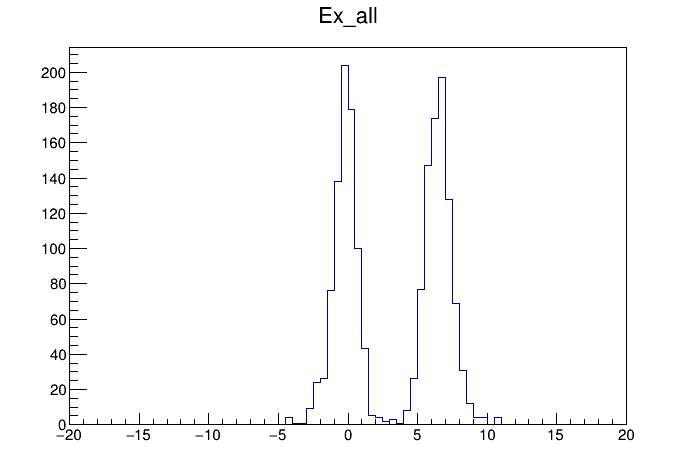

In [14]:
c2->Clear();
//q_all->Fit("g1","","",-3,3);
q_all->Draw();
gStyle->SetOptStat(0);
c2->SetLogy(0);
c2->Draw();

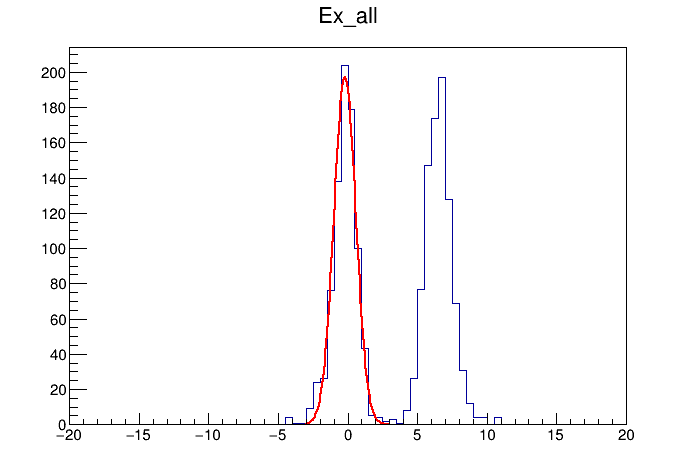

 FCN=30.7323 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=1.01455e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.97369e+02   9.15714e+00   1.94486e-02   3.01907e-05
   2  Mean        -1.83678e-01   2.97582e-02   7.77241e-05  -3.60640e-04
   3  Sigma        7.87695e-01   2.32794e-02   1.90904e-05  -2.41717e-02


In [15]:
c2->Clear();
q_all->Fit("g1","","",-3,3);
q_all->Draw();
gStyle->SetOptStat(0);
c2->SetLogy(0);
c2->Draw();

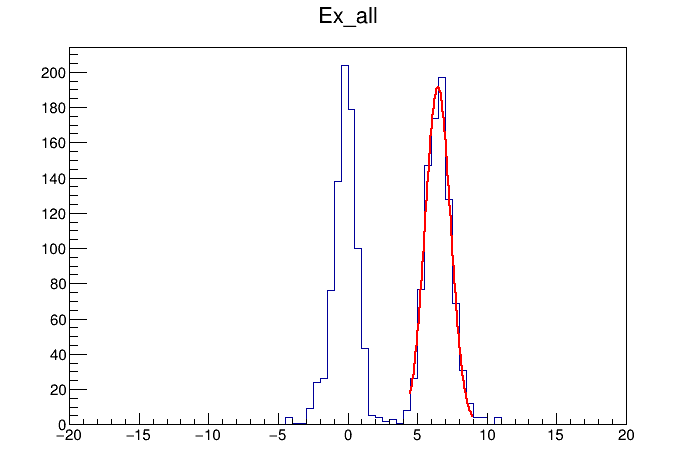

 FCN=4.64555 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=2.09958e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.91341e+02   8.43117e+00   7.58648e-03   9.60099e-05
   2  Mean         6.49515e+00   3.26879e-02   3.79169e-05   3.91494e-03
   3  Sigma        9.06807e-01   2.80378e-02   9.53641e-06   5.93568e-02


In [16]:
c2->Clear();
q_all->Fit("g1","","",4.5,9);
q_all->Draw();
c2->Draw();

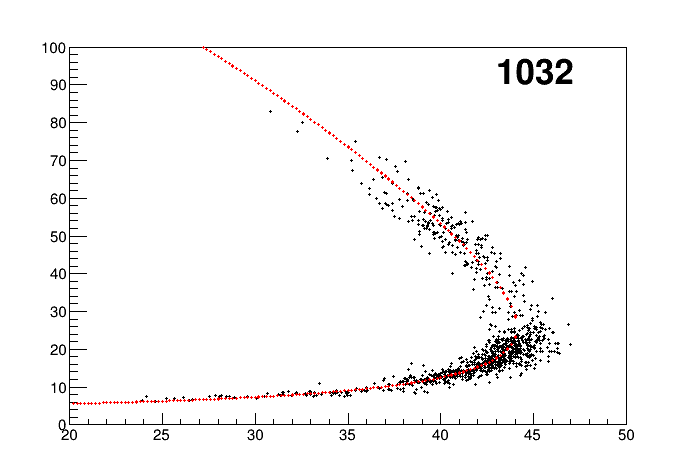

In [17]:
c2->Clear();
T1E_newtheta_new_bydstar_all->GetXaxis()->SetLimits(20, 50);
T1E_newtheta_new_bydstar_all->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_all->SetMarkerStyle(6);
T1E_newtheta_new_bydstar_all->SetMarkerColor(1);
T1E_newtheta_new_bydstar_all->Draw("ap");
T1Etheta_B14He3_0->SetMarkerStyle(6);
T1Etheta_B14He3_6100->SetMarkerStyle(6);
T1Etheta_B14He3_0->SetMarkerColor(2);
T1Etheta_B14He3_6100->SetMarkerColor(4);
T1Etheta_B14He3_0->Draw("samep");
//T1Etheta_B14He3_6100->Draw("samep");
   TText* textT1E_newtheta_new_bydstar_all = new TText(43, 90, Form("%d", T1E_newtheta_new_bydstar_all->GetN()));
   textT1E_newtheta_new_bydstar_all->SetTextAlign(15); // 设置文本对齐方式
   textT1E_newtheta_new_bydstar_all->SetTextSize(0.08); // 设置文本大小
   textT1E_newtheta_new_bydstar_all->Draw("samep"); // 在图上显示文本
c2->SetLogy(0);
c2->Draw();

In [18]:
//T1E_newtheta_new_bydstar_all;
Double_t cross_0[10],cross_7000[10],cross_6100[10];
Double_t dcross_0[10],dcross_7000[10],dcross_6100[10];
Double_t dNfinal_0[10],dNfinal_7000[10],dNfinal_6100[10];
Double_t solid_0[10],solid_7000[10],solid_6100[10];
Double_t count_0[10],tempcount_0[10],count_7000[10],count_6100[10];
Double_t low_0[10],low_7000[10],low_6100[10];
Double_t high_0[10],high_7000[10],high_6100[10];
Double_t low_cm_0[10],low_cm_7000[10],low_cm_6100[10];
Double_t high_cm_0[10],high_cm_7000[10],high_cm_6100[10];
Double_t Elow_0[10],Elow_7000[10],Elow_6100[10];
Double_t Ehigh_0[10],Ehigh_7000[10],Ehigh_6100[10];

Double_t theangle_cm_0[10],theangle_cm_7000[10],theangle_cm_6100[10];
for(Int_t ii=0;ii<10;ii++){
    cross_0[ii]=0;
    cross_7000[ii]=0;
    cross_6100[ii]=0;
    solid_0[ii]=0;
    solid_7000[ii]=0;
    solid_6100[ii]=0;
    Elow_0[ii]=0;
    Elow_7000[ii]=0;
    Elow_6100[ii]=0;
    Ehigh_0[ii]=1000;
    Ehigh_7000[ii]=1000;
    Ehigh_6100[ii]=1000;
}

low_0[0]=24;high_0[0]=32;low_cm_0[0]=159;high_cm_0[0]=171;
low_0[1]=32;high_0[1]=39;low_cm_0[1]=149;high_cm_0[1]=165;
low_0[2]=39;high_0[2]=42;low_cm_0[2]=146;high_cm_0[2]=158;
low_0[3]=42;high_0[3]=46;low_cm_0[3]=135;high_cm_0[3]=153;Ehigh_0[3]=24.8;
low_0[4]=42;high_0[4]=46;low_cm_0[4]=106;high_cm_0[4]=135;Elow_0[4]=24.8;
low_0[5]=39;high_0[5]=42;low_cm_0[5]=95;high_cm_0[5]=122;

/*
low_0[0]=24;high_0[0]=28;low_cm_0[0]=162;high_cm_0[0]=170;
low_0[1]=28;high_0[1]=32;low_cm_0[1]=158;high_cm_0[1]=168;
low_0[2]=32;high_0[2]=36;low_cm_0[2]=153;high_cm_0[2]=165;
low_0[3]=36;high_0[3]=39;low_cm_0[3]=149;high_cm_0[3]=161;
low_0[4]=39;high_0[4]=42;low_cm_0[4]=146;high_cm_0[4]=159;
low_0[5]=42;high_0[5]=46;low_cm_0[5]=135;high_cm_0[5]=153;Ehigh_0[5]=24.8;
low_0[6]=42;high_0[6]=46;low_cm_0[6]=106;high_cm_0[6]=135;Elow_0[6]=24.8;
*/
/*
theangle_cm_0[0]=157;
//theangle_cm_0[1]=152;
theangle_cm_0[1]=154.5;
theangle_cm_0[2]=142;
theangle_cm_0[3]=128;
theangle_cm_0[4]=110;
*/
low_6100[0]=23;high_6100[0]=26;low_cm_6100[0]=157;high_cm_6100[0]=166;
low_6100[1]=26;high_6100[1]=29;low_cm_6100[1]=154;high_cm_6100[1]=163;
low_6100[2]=29;high_6100[2]=32;low_cm_6100[2]=148;high_cm_6100[2]=160;
low_6100[3]=32;high_6100[3]=34;low_cm_6100[3]=142;high_cm_6100[3]=157;

low_6100[3]=26;high_6100[3]=34;low_cm_6100[3]=142;high_cm_6100[3]=163;
low_6100[4]=34;high_6100[4]=40;low_cm_6100[4]=144;high_cm_6100[4]=152;Ehigh_6100[4]=19.;
low_6100[5]=34;high_6100[5]=40;low_cm_6100[5]=136;high_cm_6100[5]=144;Elow_6100[5]=19.;Ehigh_6100[5]=24.5;
low_6100[6]=34;high_6100[6]=40;low_cm_6100[6]=129;high_cm_6100[6]=136;Elow_6100[6]=24.5;Ehigh_6100[6]=30.1;
low_6100[7]=34;high_6100[7]=40;low_cm_6100[7]=115;high_cm_6100[7]=129;Elow_6100[7]=30.1;Ehigh_6100[7]=42.7;
low_6100[8]=34;high_6100[8]=40;low_cm_6100[8]=93;high_cm_6100[8]=115;Elow_6100[8]=42.7;
low_6100[9]=32;high_6100[9]=34;low_cm_6100[9]=84;high_cm_6100[9]=111;
theangle_cm_6100[0]=162;
theangle_cm_6100[1]=159;
theangle_cm_6100[2]=155;
theangle_cm_6100[3]=151;
theangle_cm_6100[4]=147;
theangle_cm_6100[5]=140;
theangle_cm_6100[6]=133;
theangle_cm_6100[7]=122;
theangle_cm_6100[8]=109;
theangle_cm_6100[9]=97;


low_7000[0]=23;high_7000[0]=26;low_cm_7000[0]=155;high_cm_7000[0]=165;
low_7000[1]=26;high_7000[1]=29;low_cm_7000[1]=151;high_cm_7000[1]=162;
low_7000[2]=29;high_7000[2]=32;low_cm_7000[2]=144;high_cm_7000[2]=158;
low_7000[3]=32;high_7000[3]=34;low_cm_7000[3]=138;high_cm_7000[3]=155;
low_7000[4]=34;high_7000[4]=40;low_cm_7000[4]=143;high_cm_7000[4]=150;Ehigh_7000[4]=20.;
low_7000[5]=34;high_7000[5]=40;low_cm_7000[5]=136;high_cm_7000[5]=143;Elow_7000[5]=20.;Ehigh_7000[6]=24.7;
low_7000[6]=34;high_7000[6]=40;low_cm_7000[6]=129;high_cm_7000[6]=136;Elow_7000[6]=24.7;Ehigh_7000[6]=30.1;
low_7000[7]=34;high_7000[7]=40;low_cm_7000[7]=118;high_cm_7000[7]=129;Elow_7000[7]=30.1;Ehigh_7000[7]=39.6;
low_7000[8]=34;high_7000[8]=40;low_cm_7000[8]=92;high_cm_7000[8]=118;Elow_7000[8]=39.6;
low_7000[9]=32;high_7000[9]=34;low_cm_7000[9]=84;high_cm_7000[9]=116;
theangle_cm_7000[0]=161;
theangle_cm_7000[1]=157;
theangle_cm_7000[2]=153;
theangle_cm_7000[3]=149;
theangle_cm_7000[4]=145;
theangle_cm_7000[5]=140;
theangle_cm_7000[6]=132;
theangle_cm_7000[7]=124;
theangle_cm_7000[8]=111;
theangle_cm_7000[9]=100;

Double_t angle_cm_left_0[10], angle_cm_left_6100[10],  angle_cm_left_7000[10];
Double_t angle_cm_right_0[10], angle_cm_right_6100[10],  angle_cm_right_7000[10];
Double_t dangle_left_0[10],dangle_left_6100[10],dangle_left_7000[10];
Double_t dangle_right_0[10],dangle_right_6100[10],dangle_right_7000[10];

angle_cm_left_0[0]=162.54;  angle_cm_right_0[0]=168.39;
angle_cm_left_0[1]=154.35;  angle_cm_right_0[1]=162.54;
angle_cm_left_0[2]=147.87;  angle_cm_right_0[2]=154.35;
angle_cm_left_0[3]=135;     angle_cm_right_0[3]=147.87;
angle_cm_left_0[4]=117.72;  angle_cm_right_0[4]=135;
angle_cm_left_0[5]=105.21;  angle_cm_right_0[5]=117.72;

/*
angle_cm_left_0[0]=165.69;  angle_cm_right_0[0]=168.39;
angle_cm_left_0[1]=162.54;  angle_cm_right_0[1]=165.69;
angle_cm_left_0[2]=158.49;  angle_cm_right_0[2]=162.54;
angle_cm_left_0[3]=154.35;  angle_cm_right_0[3]=158.49;
angle_cm_left_0[4]=147.87;  angle_cm_right_0[4]=154.35;
angle_cm_left_0[5]=135;     angle_cm_right_0[5]=147.87;
angle_cm_left_0[6]=117.72;  angle_cm_right_0[6]=135;
*/
angle_cm_left_6100[0]=160.65;	angle_cm_right_6100[0]=163.62;
angle_cm_left_6100[1]=157.05;	angle_cm_right_6100[1]=160.65;
angle_cm_left_6100[2]=152.55;	angle_cm_right_6100[2]=157.05;
angle_cm_left_6100[3]=148.59;	angle_cm_right_6100[3]=152.55;

angle_cm_left_6100[3]=148.59;	angle_cm_right_6100[3]=160.65;
angle_cm_left_6100[4]=144;   	angle_cm_right_6100[4]=148.59;
angle_cm_left_6100[5]=136;	angle_cm_right_6100[5]=144;
angle_cm_left_6100[6]=129;   	angle_cm_right_6100[6]=136;
angle_cm_left_6100[7]=115;	angle_cm_right_6100[7]=129;
angle_cm_left_6100[8]=100.98;   	angle_cm_right_6100[8]=115;
angle_cm_left_6100[9]=92.97; 	angle_cm_right_6100[9]=100.98;

angle_cm_left_7000[0]=159.3;	angle_cm_right_7000[0]=162.63;
angle_cm_left_7000[1]=155.43;	angle_cm_right_7000[1]=159.3;
angle_cm_left_7000[2]=150.3; 	angle_cm_right_7000[2]=155.43;
angle_cm_left_7000[3]=145.53;	angle_cm_right_7000[3]=150.3;
angle_cm_left_7000[4]=143;   	angle_cm_right_7000[4]=145.53;
angle_cm_left_7000[5]=136;	angle_cm_right_7000[5]=143;
angle_cm_left_7000[6]=129;   	angle_cm_right_7000[6]=136;
angle_cm_left_7000[7]=118;	angle_cm_right_7000[7]=129;
angle_cm_left_7000[8]=103.95;	angle_cm_right_7000[8]=118;
angle_cm_left_7000[9]=95.13;  	angle_cm_right_7000[9]=103.95;


for(Int_t ii=0;ii<7;ii++)theangle_cm_0[ii]=(angle_cm_left_0[ii]+angle_cm_right_0[ii])/2.;
for(Int_t ii=0;ii<10;ii++)theangle_cm_6100[ii]=(angle_cm_left_6100[ii]+angle_cm_right_6100[ii])/2.;
for(Int_t ii=0;ii<10;ii++){
    dangle_left_0[ii]=theangle_cm_0[ii]-angle_cm_left_0[ii];
    dangle_right_0[ii]=-theangle_cm_0[ii]+angle_cm_right_0[ii];
    dangle_left_7000[ii]=theangle_cm_7000[ii]-angle_cm_left_7000[ii];
    dangle_right_7000[ii]=-theangle_cm_7000[ii]+angle_cm_right_7000[ii];
    dangle_left_6100[ii]=theangle_cm_6100[ii]-angle_cm_left_6100[ii];
    dangle_right_6100[ii]=-theangle_cm_6100[ii]+angle_cm_right_6100[ii];
}


Int_t npoints_all=T1E_newtheta_new_bydstar_all->GetN();
Double_t *E_dall=T1E_newtheta_new_bydstar_all->GetY();
Double_t *theta_dall=T1E_newtheta_new_bydstar_all->GetX();
Double_t *Q_dall=T1E_newtheta_new_bydstar_all2->GetY();
Double_t thetafde1[1000002],thetafang1[1000002],thetheta_cm1[1000002],thedd=100000,theddtemp;
Double_t thetafde2[1000002],thetafang2[1000002],thetheta_cm2[1000002];
Double_t thetafde1_6100[1000002],thetafang1_6100[1000002],thetheta_cm1_6100[1000002];
Double_t thetafde2_6100[1000002],thetafang2_6100[1000002],thetheta_cm2_6100[1000002];
Int_t theid;
for(Int_t ii=0;ii<1000002;ii++){
    thetafde1[ii]=0;
    thetafang1[ii]=0;
    thetheta_cm1[ii]=0;
    thetafde2[ii]=0;
    thetafang2[ii]=0;
    thetheta_cm2[ii]=0;
    thetafde1_6100[ii]=0;
    thetafang1_6100[ii]=0;
    thetheta_cm1_6100[ii]=0;
    thetafde2_6100[ii]=0;
    thetafang2_6100[ii]=0;
    thetheta_cm2_6100[ii]=0;
}
Int_t count_g4_1=0,count_g4_2=0;

   TFile *udead2=new TFile("/data/d1/share/zhuhy/2023geant4sim_solid/hit/realhit.root");
   TTree *tudead2=(TTree*) udead2->Get("tree");
   int countE_theta_lab1=0,countE_theta_lab2=0;
   TGraph *E_theta_lab_1=new TGraph;
   TGraph *E_theta_lab_2=new TGraph;
   TGraph *E_theta_lab=new TGraph;
   Int_t count_E_theta_lab=0;

   Double_t tafde,tafangle,theta_cm,theEx,nowEx;
   tudead2->SetBranchAddress("tafde", &tafde);
   tudead2->SetBranchAddress("tafangle", &tafangle);
   tudead2->SetBranchAddress("theta_cm", &theta_cm);
   tudead2->SetBranchAddress("Ex", &theEx);
   tudead2->SetBranchAddress("nowEx", &nowEx);
   Long64_t nentries05 = tudead2->GetEntries();
   for (Long64_t jentry05=1; jentry05<nentries05;jentry05++) {
      tudead2->GetEntry(jentry05);
      if(tafangle>15&&tafangle<50&&nowEx>0)E_theta_lab_1->SetPoint(countE_theta_lab1++,tafangle,tafde);
      if(tafangle>15&&tafangle<50&&nowEx<0)E_theta_lab_2->SetPoint(countE_theta_lab2++,tafangle,tafde);
      if(tafangle>15&&tafangle<50&&tafde>=11&&tafde<100&&count_E_theta_lab<5000)E_theta_lab->SetPoint(count_E_theta_lab++,tafangle,tafde);
      if(tafangle>15&&tafangle<50&&tafde>=6&&theta_cm>100&&theEx>-3&&theEx<5){
          if(nowEx>=0){
              thetafde1[count_g4_1]=tafde;
              thetafang1[count_g4_1]=tafangle;  
              thetheta_cm1[count_g4_1]=theta_cm; 
              count_g4_1++;
          }          
          else if(nowEx<0){
              thetafde2[count_g4_2]=tafde;
              thetafang2[count_g4_2]=tafangle;  
              thetheta_cm2[count_g4_2]=theta_cm; 
              count_g4_2++;
          }
      }
   }

Int_t count_g4_1_6100=0,count_g4_2_6100=0;

   TFile *udead2_6100=new TFile("/data/d1/share/zhuhy/2023geant4sim_solid/hit/hit_6100.root");
   TTree *tudead2_6100=(TTree*) udead2_6100->Get("tree");
   int countE_theta_lab1_6100=0,countE_theta_lab2_6100=0;
   TGraph *E_theta_lab_1_6100=new TGraph;
   TGraph *E_theta_lab_2_6100=new TGraph;
   TGraph *E_theta_lab_6100=new TGraph;
   Int_t count_E_theta_lab_6100=0;

   Double_t tafde1_6100,tafangle1_6100,theta_cm1_6100,theEx1_6100,nowEx1_6100;
   tudead2_6100->SetBranchAddress("tafde", &tafde1_6100);
   tudead2_6100->SetBranchAddress("tafangle", &tafangle1_6100);
   tudead2_6100->SetBranchAddress("theta_cm", &theta_cm1_6100);
   tudead2_6100->SetBranchAddress("Ex", &theEx1_6100);
   tudead2_6100->SetBranchAddress("nowEx", &nowEx1_6100);
   Long64_t nentries05_6100 = tudead2_6100->GetEntries();
   for (Long64_t jentry05_6100=1; jentry05_6100<nentries05_6100;jentry05_6100++) {
      tudead2_6100->GetEntry(jentry05_6100);
      if(tafangle1_6100>15&&tafangle1_6100<50&&nowEx1_6100>0)E_theta_lab_1_6100->SetPoint(countE_theta_lab1_6100++,tafangle1_6100,tafde1_6100);
      if(tafangle1_6100>15&&tafangle1_6100<50&&nowEx1_6100<0)E_theta_lab_2_6100->SetPoint(countE_theta_lab2_6100++,tafangle1_6100,tafde1_6100);
      if(tafangle1_6100>15&&tafangle1_6100<50&&tafde1_6100>=11&&tafde1_6100<100&&count_E_theta_lab_6100<5000)E_theta_lab_6100->SetPoint(count_E_theta_lab_6100++,tafangle1_6100,tafde1_6100);
      if(tafangle1_6100>15&&tafangle1_6100<50&&tafde1_6100>=6){
          if(nowEx1_6100>0){
              thetafde1_6100[count_g4_1_6100]=tafde1_6100;
              thetafang1_6100[count_g4_1_6100]=tafangle1_6100;  
              thetheta_cm1_6100[count_g4_1_6100]=theta_cm1_6100; 
              count_g4_1_6100++;
          }          
          else if(nowEx1_6100<0){
              thetafde2_6100[count_g4_2_6100]=tafde1_6100;
              thetafang2_6100[count_g4_2_6100]=tafangle1_6100;  
              thetheta_cm2_6100[count_g4_2_6100]=theta_cm1_6100; 
              count_g4_2_6100++;
          }
      }
   }
cout<<count_g4_1<<'\t'<<count_g4_2<<'\n';
cout<<count_g4_1_6100<<'\t'<<count_g4_2_6100<<'\n';

224081	0
0	156968


In [19]:
   TGraph *E_theta_cm_1=new TGraph;
   TGraph *E_theta_cm_2=new TGraph;
   TGraph *theta_thetacm_7000=new TGraph;
   TH1F* h_E_exp_1 = new TH1F("E_exp_1", "E_exp_1", 100, 0, 20);
   TH1F* h_E_exp_2 = new TH1F("E_exp_2", "E_exp_2", 100, 0, 20);
   TH2F* h_E_theta_cm_1 = new TH2F("h_E_theta_cm_gs", "E vs Theta_cm_gs", 200, 0, 180, 200, 0, 100);
   TH2F* h_E_theta_cm_2 = new TH2F("h_E_theta_cm_Ex", "E vs Theta_cm_Ex", 200, 0, 180, 200, 0, 100);
   TH2F* h_E_theta_cm_all = new TH2F("h_E_theta_cm_all", "E vs Theta_cm_all", 200, 0, 180, 200, 0, 100);

Int_t thecount1=0,thecount2=0,thecount22=0;
Int_t thein;
for(Int_t i=0;i<npoints_all;i++){
    thedd=100000;
    theid=-1;
    //if(i%100==0)cout<<Q_dall[i]<<'\n';
    if(Q_dall[i]>3)continue;
    if(theta_dall[i]>36&&theta_dall[i]<46)h_E_exp_1->Fill(E_dall[i]);
    for(Int_t j=0;j<count_g4_1;j++){
        theddtemp=100000;
        if(abs(theta_dall[i]-thetafang1[j])>1||abs(E_dall[i]-thetafde1[j])>1)continue;
        //cout<<"exp: E="<<E_dall[i]<<'\t'<<"angle="<<theta_dall[i]<<'\t'<<"g4: E="<<thetafde[j]<<'\t'<<"angle="<<thetafang[j]<<'\n';
        theddtemp=(theta_dall[i]-thetafang1[j])*(theta_dall[i]-thetafang1[j])+
                  (E_dall[i]-thetafde1[j])*(E_dall[i]-thetafde1[j]);
        if(theddtemp<thedd){thedd=theddtemp;theid=j;}
        //if(i%100==0&&j%10000==0)cout<<"thedd="<<thedd<<'\t'<<"theddtemp="<<theddtemp<<'\n';
    }
    //cout<<"exp: E="<<E_dall[i]<<'\t'<<"angle="<<theta_dall[i]<<'\t'<<"theta_cm="<<thetheta_cm2[theid]
    if(thedd!=-1&&thedd!=100000){        
        thein=-1;
        for(Int_t ii=0;ii<7;ii++){
            if(thetheta_cm1[theid]>low_cm_0[ii]&&thetheta_cm1[theid]<high_cm_0[ii]&&
              theta_dall[i]>low_0[ii]&&theta_dall[i]<high_0[ii]&&
              E_dall[i]>Elow_0[ii]&&E_dall[i]<Ehigh_0[ii])thein=ii;
        }
        if(thein>=0)count_0[thein]+=1;
//if(!(thein>=0&&thein<=5))cout<<thein<<"exp: E="<<E_dall[i]<<'\t'<<"angle="<<theta_dall[i]<<'\t'<<"theta_cm="<<thetheta_cm1[theid]<<'\n';
        E_theta_cm_1->SetPoint(thecount1++,thetheta_cm1[theid]+(Double_t)(rand()%100-50)/500.,E_dall[i]);
        h_E_theta_cm_1->Fill(thetheta_cm1[theid]+(Double_t)(rand()%100-50)/500., E_dall[i]);
        h_E_theta_cm_all->Fill(thetheta_cm1[theid]+(Double_t)(rand()%100-50)/500., E_dall[i]);
    }
}

for(Int_t i=0;i<npoints_all;i++){
    thedd=100000;
    theid=-1;
    //if(i%100==0)cout<<Q_dall[i]<<'\n';
    if(Q_dall[i]<=3)continue;
    if(theta_dall[i]>24&&theta_dall[i]<40)h_E_exp_2->Fill(E_dall[i]);
    for(Int_t j=0;j<count_g4_2_6100;j++){
        theddtemp=100000;
        if(abs(theta_dall[i]-thetafang2_6100[j])>1||abs(E_dall[i]-thetafde2_6100[j])>1)continue;
        //if(i%100==0&&j%10000==0)cout<<"exp: E="<<E_dall[i]<<'\t'<<"angle="<<theta_dall[i]<<'\t'<<"g4: E="<<thetafde[j]<<'\t'<<"angle="<<thetafang[j]<<'\n';
        theddtemp=(theta_dall[i]-thetafang2_6100[j])*(theta_dall[i]-thetafang2_6100[j])+
                  (E_dall[i]-thetafde2_6100[j])*(E_dall[i]-thetafde2_6100[j]);
        if(theddtemp<thedd){thedd=theddtemp;theid=j;}
        //if(i%100==0&&j%10000==0)cout<<"thedd="<<thedd<<'\t'<<"theddtemp="<<theddtemp<<'\n';
    }
    if(thedd!=-1&&thedd!=100000){
        thein=-1;
        for(Int_t ii=0;ii<10;ii++){
            if(thetheta_cm2_6100[theid]>low_cm_6100[ii]&&thetheta_cm2_6100[theid]<high_cm_6100[ii]&&
              theta_dall[i]>low_6100[ii]&&theta_dall[i]<high_6100[ii]&&
               E_dall[i]>Elow_6100[ii]&&E_dall[i]<Ehigh_6100[ii])thein=ii;
        }
        if(thein>=0)count_6100[thein]+=1;
        //cout<<"theta_cm = "<<thetheta_cm1[theid]<<'\t'<<"theta = "<<theta_dall[i]<<'\t'<<"E = "<<E_dall[i]<<'\t'<<"thein="<<'\n';
    }
}

for(Int_t i=0;i<npoints_all;i++){
    thedd=100000;
    theid=-1;
    //if(i%100==0)cout<<Q_dall[i]<<'\n';
    if(Q_dall[i]<=3)continue;
    for(Int_t j=0;j<count_g4_2_6100;j++){
        theddtemp=100000;
        if(abs(theta_dall[i]-thetafang2[j])>1||abs(E_dall[i]-thetafde2[j])>1)continue;
        //if(i%100==0&&j%10000==0)cout<<"exp: E="<<E_dall[i]<<'\t'<<"angle="<<theta_dall[i]<<'\t'<<"g4: E="<<thetafde[j]<<'\t'<<"angle="<<thetafang[j]<<'\n';
        theddtemp=(theta_dall[i]-thetafang2[j])*(theta_dall[i]-thetafang2[j])+
                  (E_dall[i]-thetafde2[j])*(E_dall[i]-thetafde2[j]);
        if(theddtemp<thedd){thedd=theddtemp;theid=j;}
        //if(i%100==0&&j%10000==0)cout<<"thedd="<<thedd<<'\t'<<"theddtemp="<<theddtemp<<'\n';
    }
    if(thedd!=-1&&thedd!=100000){
        thein=-1;
        for(Int_t ii=0;ii<10;ii++){
            if(thetheta_cm2[theid]>low_cm_7000[ii]&&thetheta_cm2[theid]<high_cm_7000[ii]&&
              theta_dall[i]>low_7000[ii]&&theta_dall[i]<high_7000[ii]&&
               E_dall[i]>Elow_7000[ii]&&E_dall[i]<Ehigh_7000[ii])thein=ii;
        }
        if(thein>=0)count_7000[thein]+=1;
        //cout<<"theta_cm = "<<thetheta_cm1[theid]<<'\t'<<"theta = "<<theta_dall[i]<<'\t'<<"E = "<<E_dall[i]<<'\t'<<"thein="<<'\n';
        E_theta_cm_2->SetPoint(thecount2++,thetheta_cm2[theid]+(Double_t)(rand()%100-50)/500.,E_dall[i]);
        h_E_theta_cm_2->Fill(thetheta_cm2[theid]+(Double_t)(rand()%100-50)/500., E_dall[i]);
        h_E_theta_cm_all->Fill(thetheta_cm2[theid]+(Double_t)(rand()%100-50)/500., E_dall[i]);
        theta_thetacm_7000->SetPoint(thecount22++,thetheta_cm2[theid]+(Double_t)(rand()%100-50)/500.,theta_dall[i]);
    }
}

cout<<"************ 7.012 MeV***************"<<'\n';
for(Int_t ii=0;ii<10;ii++)cout<<count_0[ii]<<'\t'<<count_7000[ii]<<'\n';
cout<<"************ 6.094 MeV***************"<<'\n';
for(Int_t ii=0;ii<10;ii++)cout<<count_0[ii]<<'\t'<<count_6100[ii]<<'\n';
Double_t countCtar_0[10],countCtar_6100[10],countCtar_7000[10];
Double_t countnotar_0[10],countnotar_6100[10],countnotar_7000[10];

countCtar_0[0]=2.;
countCtar_0[1]=6.;
countCtar_0[2]=20.;
countCtar_0[3]=29.;
countCtar_0[4]=11.;
countCtar_0[5]=24.;



/*
countCtar_0[0]=1.;
countCtar_0[1]=1.;
countCtar_0[2]=4.;
countCtar_0[3]=6.;
countCtar_0[4]=23.;
countCtar_0[5]=29.;
countCtar_0[6]=12.;
*/
/*
countCtar_0[0]=6.;
countCtar_0[1]=10.;
countCtar_0[2]=13.;
countCtar_0[3]=24.;
countCtar_0[4]=27.;
countCtar_0[5]=18.;
countCtar_0[6]=28.;
*/
/*
countCtar_7000[0]=2.;
countCtar_7000[1]=5.;
countCtar_7000[2]=13.;
countCtar_7000[3]=16.;
countCtar_7000[4]=7.;
countCtar_7000[5]=11.;
countCtar_7000[6]=8.;
countCtar_7000[7]=15.;
countCtar_7000[8]=13.;
countCtar_7000[9]=12.;

countCtar_6100[0]=1.;
countCtar_6100[1]=3.;
countCtar_6100[2]=8.;
countCtar_6100[3]=17.;
countCtar_6100[4]=4.;
countCtar_6100[5]=13.;
countCtar_6100[6]=8.;
countCtar_6100[7]=20.;
countCtar_6100[8]=8.;
countCtar_6100[9]=11.;
*/
countCtar_7000[0]=4.;
countCtar_7000[1]=13.;
countCtar_7000[2]=34.;
countCtar_7000[3]=15.;
countCtar_7000[4]=9.;
countCtar_7000[5]=20.;
countCtar_7000[6]=22.;
countCtar_7000[7]=27.;
countCtar_7000[8]=22.;
countCtar_7000[9]=17.;

countCtar_6100[0]=0.;
countCtar_6100[1]=0.;
countCtar_6100[2]=0.;
countCtar_6100[3]=86.;
countCtar_6100[4]=14.;
countCtar_6100[5]=21.;
countCtar_6100[6]=27.;
countCtar_6100[7]=34.;
countCtar_6100[8]=14.;
countCtar_6100[9]=17.;


countnotar_0[0]=0.;
//countnotar_0[1]=4.;
countnotar_0[1]=0.;
countnotar_0[2]=0.;
countnotar_0[3]=0.;
countnotar_0[4]=0.;
countnotar_0[5]=0.;
countnotar_0[6]=0.;
countnotar_0[7]=0.;

countnotar_7000[0]=0.;
countnotar_7000[1]=0.;
countnotar_7000[2]=0.;
countnotar_7000[3]=0.;
countnotar_7000[4]=0.;
countnotar_7000[5]=0.;
countnotar_7000[6]=0.;
countnotar_7000[7]=0.;
countnotar_7000[8]=0.;
countnotar_7000[9]=0.;


countnotar_6100[0]=0.;
countnotar_6100[1]=0.;
countnotar_6100[2]=0.;
countnotar_6100[3]=0.;
countnotar_6100[4]=0.;
countnotar_6100[5]=0.;
countnotar_6100[6]=0.;
countnotar_6100[7]=0.;
countnotar_6100[8]=0.;
countnotar_6100[9]=0.;
/****前面run
Nfinnal=NCH-（NC-5.6475*Nempty）/4.3307-6.3247*Nempty 
= NCH-NC/4.3307-5.0206*Nempty
dNfinnal= dNCH+dNC/4.3307+ dNempty *5.0206
**********/
for(Int_t ii=0;ii<7;ii++)tempcount_0[ii]=count_0[ii];
for(Int_t ii=0;ii<7;ii++)count_0[ii]=count_0[ii]-countCtar_0[ii]/4.519;
for(Int_t ii=0;ii<10;ii++)count_6100[ii]=count_6100[ii]-(countCtar_6100[ii]-5.6475*countnotar_6100[ii])/4.3307-6.3247*countnotar_6100[ii];
for(Int_t ii=0;ii<10;ii++)count_7000[ii]=count_7000[ii]-(countCtar_7000[ii]-5.6475*countnotar_7000[ii])/4.3307-6.3247*countnotar_7000[ii];

for(Int_t ii=0;ii<7;ii++)dNfinal_0[ii]=count_0[ii]*count_0[ii]/(tempcount_0[ii]+countCtar_0[ii]*countCtar_0[ii]/(4.519*4.519));
for(Int_t ii=0;ii<10;ii++)dNfinal_6100[ii]=count_6100[ii]+countCtar_6100[ii]/4.3307+countnotar_6100[ii]*5.0206;
for(Int_t ii=0;ii<10;ii++)dNfinal_7000[ii]=count_7000[ii]+countCtar_7000[ii]/4.3307+countnotar_7000[ii]*5.0206;

/*加起来
//Nfinnal=NCH-（NC-5.20Nempty）/4.518-5.58*Nempty
//dNfinnal= dNCH+dNC/4.518+ dNempty *4.429
for(Int_t ii=0;ii<7;ii++)dNfinal_0[ii]=count_0[ii]+countCtar_0[ii]/4.518+countnotar_0[ii]*4.429;
for(Int_t ii=0;ii<10;ii++)dNfinal_6100[ii]=count_6100[ii]+countCtar_6100[ii]/4.518+countnotar_6100[ii]*4.429;
for(Int_t ii=0;ii<10;ii++)dNfinal_7000[ii]=count_7000[ii]+countCtar_7000[ii]/4.518+countnotar_7000[ii]*4.429;
for(Int_t ii=0;ii<7;ii++)count_0[ii]=count_0[ii]-(countCtar_0[ii]-5.20*countnotar_0[ii])/4.518-5.58*countnotar_0[ii];
for(Int_t ii=0;ii<10;ii++)count_6100[ii]=count_6100[ii]-(countCtar_6100[ii]-5.20*countnotar_6100[ii])/4.518-5.58*countnotar_6100[ii];
for(Int_t ii=0;ii<10;ii++)count_7000[ii]=count_7000[ii]-(countCtar_7000[ii]-5.20*countnotar_7000[ii])/4.518-5.58*countnotar_7000[ii];
*/

************ 7.012 MeV***************
25	0
91	0
160	0
413	0
108	0
123	0
0	0
0	0
0	0
0	0
************ 6.094 MeV***************
25	0
91	0
160	0
413	0
108	0
123	0
0	0
0	0
0	0
0	0


In [20]:
//cout<<"************ 7.012 MeV***************"<<'\n';
//for(Int_t ii=0;ii<10;ii++)cout<<count_0[ii]<<'\t'<<count_7000[ii]<<'\n';
cout<<"************ 6.094 MeV***************"<<'\n';
for(Int_t ii=0;ii<10;ii++)cout<<count_0[ii]<<'\t'<<count_6100[ii]<<'\n';

************ 6.094 MeV***************
24.5574	0
89.6723	0
155.574	0
406.583	-19.8582
105.566	-3.23273
117.689	-4.8491
0	-6.23456
0	-7.85092
0	-3.23273
0	-3.92546


In [21]:
   Double_t countin=906760843;
   Double_t Emin=4.;
   TGraphAsymmErrors *thecross_0=new TGraphAsymmErrors;
   TGraphAsymmErrors *thecross_7000=new TGraphAsymmErrors;
   TGraphAsymmErrors *thecross_6100=new TGraphAsymmErrors;
   TGraphAsymmErrors *fitthecross_0=new TGraphAsymmErrors;
   TGraphAsymmErrors *fitthecross_7000=new TGraphAsymmErrors;
   TGraphAsymmErrors *fitthecross_6100=new TGraphAsymmErrors;
   TFile *filesolid_0=new TFile("/data/d1/share/zhuhy/2023geant4sim_solid/hit/hit_34.root");
   TTree *treesolid_0=(TTree*) filesolid_0->Get("tree");
   Double_t tafde_0,tafangle_0,theta_cm_0,theEx_0,nowEx_0;
   treesolid_0->SetBranchAddress("tafde", &tafde_0);
   treesolid_0->SetBranchAddress("tafangle", &tafangle_0);
   treesolid_0->SetBranchAddress("theta_cm", &theta_cm_0);
   treesolid_0->SetBranchAddress("Ex", &theEx_0);
   treesolid_0->SetBranchAddress("nowEx", &nowEx_0);
   Long64_t nentries_0 = treesolid_0->GetEntries();
   Double_t angle_cm;
   for (Long64_t jentry_0=0; jentry_0<nentries_0;jentry_0++) {
        treesolid_0->GetEntry(jentry_0);    
        thein=-1;
        if(tafde_0<Emin)continue;
        for(Int_t ii=0;ii<7;ii++){
            if(theta_cm_0>low_cm_0[ii]&&theta_cm_0<high_cm_0[ii]&&
              tafangle_0>low_0[ii]&&tafangle_0<high_0[ii]&&
              tafde_0>Elow_0[ii]&&tafde_0<Ehigh_0[ii]
              &&theEx_0<5&&theEx_0>-3
              &&theta_cm_0>100)thein=ii;
        }
        if(thein>=0)solid_0[thein]+=1;
   }
   TFile *filesolid_7000=new TFile("/data/d1/share/zhuhy/2023geant4sim_solid/hit/hit_6100.root");
   TTree *treesolid_7000=(TTree*) filesolid_7000->Get("tree");
   Double_t tafde_7000,tafangle_7000,theta_cm_7000,theEx_7000,nowEx_7000;
   treesolid_7000->SetBranchAddress("tafde", &tafde_7000);
   treesolid_7000->SetBranchAddress("tafangle", &tafangle_7000);
   treesolid_7000->SetBranchAddress("theta_cm", &theta_cm_7000);
   treesolid_7000->SetBranchAddress("Ex", &theEx_7000);
   treesolid_7000->SetBranchAddress("nowEx", &nowEx_7000);
   Long64_t nentries_7000 = treesolid_7000->GetEntries();
   for (Long64_t jentry_7000=0; jentry_7000<nentries_7000;jentry_7000++) {
        treesolid_7000->GetEntry(jentry_7000);    
        thein=-1;
        if(tafde_7000<Emin)continue;
        for(Int_t ii=0;ii<10;ii++){
            if(theta_cm_7000>low_cm_7000[ii]&&theta_cm_7000<high_cm_7000[ii]&&
              tafangle_7000>low_7000[ii]&&tafangle_7000<high_7000[ii]&&
              tafde_7000>Elow_7000[ii]&&tafde_7000<Ehigh_7000[ii])thein=ii;
        }
        if(thein>=0)solid_7000[thein]+=1;
   }
   TFile *filesolid_6100=new TFile("/data/d1/share/zhuhy/2023geant4sim_solid/hit/hit_6100.root");
   TTree *treesolid_6100=(TTree*) filesolid_6100->Get("tree");
   Double_t tafde_6100,tafangle_6100,theta_cm_6100,theEx_6100,nowEx_6100;
   treesolid_6100->SetBranchAddress("tafde", &tafde_6100);
   treesolid_6100->SetBranchAddress("tafangle", &tafangle_6100);
   treesolid_6100->SetBranchAddress("theta_cm", &theta_cm_6100);
   treesolid_6100->SetBranchAddress("Ex", &theEx_6100);
   treesolid_6100->SetBranchAddress("nowEx", &nowEx_6100);
   Long64_t nentries_6100 = treesolid_6100->GetEntries();
   for (Long64_t jentry_6100=0; jentry_6100<nentries_6100;jentry_6100++) {
        treesolid_6100->GetEntry(jentry_6100);    
        thein=-1;
        if(tafde_6100<Emin)continue;
        for(Int_t ii=0;ii<10;ii++){
            if(theta_cm_6100>low_cm_6100[ii]&&theta_cm_6100<high_cm_6100[ii]&&
              tafangle_6100>low_6100[ii]&&tafangle_6100<high_6100[ii]&&
              tafde_6100>Elow_6100[ii]&&tafde_6100<Ehigh_6100[ii])thein=ii;
        }
        if(thein>=0)solid_6100[thein]+=1;
   }

//cout<<"************ 7.012 MeV solid***************"<<'\n';
//for(Int_t ii=0;ii<10;ii++)cout<<solid_0[ii]<<'\t'<<solid_7000[ii]<<'\n';
   cout<<'\n';
cout<<"************ 6.094 MeV solid***************"<<'\n';
for(Int_t ii=0;ii<3;ii++)cout<<solid_0[ii]<<'\t'<<0<<'\n';
for(Int_t ii=3;ii<10;ii++)cout<<solid_0[ii]<<'\t'<<solid_6100[ii]<<'\n';

//10 35

Double_t thecross0,thecross1,thedcross0,thedcross1;
cout<<"cross of g,s : "<<'\n';
//4 9 606 1591

Double_t cmlow0,cmhigh0;
Double_t cmlow1,cmhigh1;
/*
cmlow0=163.44;cmhigh0=168.39;
cmlow1=160.65;cmhigh1=163.44;
       thecross0=1e27*(6)/(countin*_ntarget*606*3.1416*4/1000000.);
       thedcross0=thecross0*sqrt(1/(Double_t)(6)+1/(Double_t)(1154)+1/(Double_t)(_ntarget)+1/(Double_t)(countin)+1/(Double_t)(1e6));
       thecross_0->SetPoint(0, 180-(cmlow0+cmhigh0)/2,thecross0);
       thecross_0->SetPointEXlow(0, 170.64-(cmlow0+cmhigh0)/2);
       thecross_0->SetPointEXhigh(0, (cmlow0+cmhigh0)/2-cmlow0);
       thecross_0->SetPointEYlow(0, thedcross0);
       thecross_0->SetPointEYhigh(0, thedcross0);
       fitthecross_0->SetPoint(0, 180-(cmlow0+cmhigh0)/2,thecross0);
       fitthecross_0->SetPointEYlow(0, thedcross0);
       fitthecross_0->SetPointEYhigh(0, thedcross0);
       thecross1=1e27*(17)/(countin*_ntarget*1591*3.1416*4/1000000.);
       thedcross1=thecross1*sqrt(1/(Double_t)(17)+1/(Double_t)(831)+1/(Double_t)(_ntarget)+1/(Double_t)(countin)+1/(Double_t)(1e6));
       thecross_0->SetPoint(1, 180-(cmlow1+cmhigh1)/2,thecross1);
       thecross_0->SetPointEXlow(1, cmhigh1-(cmlow1+cmhigh1)/2);
       thecross_0->SetPointEXhigh(1, (cmlow1+cmhigh1)/2-cmlow1);
       thecross_0->SetPointEYlow(1, thedcross1);
       thecross_0->SetPointEYhigh(1, thedcross1);
       fitthecross_0->SetPoint(1, 180-(cmlow1+cmhigh1)/2,thecross1);
       fitthecross_0->SetPointEYlow(1, thedcross1);
       fitthecross_0->SetPointEYhigh(1, thedcross1);
       
       
       cross_0[0]=thecross0;
       cross_0[1]=thecross1;
       dcross_0[0]=thedcross0;
       dcross_0[1]=thedcross1;
      cout<<cross_0[0]<<'\t'<<dcross_0[0]<<'\n';
      cout<<cross_0[1]<<'\t'<<dcross_0[1]<<'\n';
*/
   for(Int_t ii=0;ii<5;ii++){
       cross_0[ii]=1e27*count_0[ii]/(countin*_ntarget*solid_0[ii]*3.1416*4/1000000.);
       dcross_0[ii]=cross_0[ii]*sqrt(1/(Double_t)(dNfinal_0[ii])+1/(Double_t)(solid_0[ii])+1/(Double_t)(_ntarget)+1/(Double_t)(countin)+1/(Double_t)(1e6));
//cout<<ii<<":"<<'\t'<<dNfinal_0[ii]<<'\t'<<solid_0[ii]<<'\t'<<_ntarget<<'\t'<<countin<<'\n';
       cout<<cross_0[ii]<<'\t'<<dcross_0[ii]<<'\n';
       angle_cm=(low_cm_0[ii]+high_cm_0[ii])/2.;
       //165.69	170.64  160.65	165.69
       //166.41	170.64 160.65	164.25
       thecross_0->SetPoint(ii, 180-theangle_cm_0[ii],cross_0[ii]);
       thecross_0->SetPointEXlow(ii, dangle_right_0[ii]);
       thecross_0->SetPointEXhigh(ii, dangle_left_0[ii]);
       thecross_0->SetPointEYlow(ii, dcross_0[ii]);
       thecross_0->SetPointEYhigh(ii, dcross_0[ii]);
       fitthecross_0->SetPoint(ii, 180-theangle_cm_0[ii],cross_0[ii]);
       fitthecross_0->SetPointEYlow(ii, dcross_0[ii]);
       fitthecross_0->SetPointEYhigh(ii, dcross_0[ii]);
       
   }
/*
   cout<<"cross of 7012: "<<'\n';
   for(Int_t ii=1;ii<9;ii++){
       cross_7000[ii]=1e27*count_7000[ii]/(countin*_ntarget*solid_7000[ii]*3.1416*4/1000000.);
       dcross_7000[ii]=cross_7000[ii]*sqrt(1/(Double_t)(dNfinal_7000[ii])+1/(Double_t)(solid_7000[ii])+1/(Double_t)(_ntarget)+1/(Double_t)(countin)+1/(Double_t)(1e6));
       cout<<cross_7000[ii]<<'\t'<<dcross_7000[ii]<<'\n';
       angle_cm=(low_cm_7000[ii]+high_cm_7000[ii])/2.;
       thecross_7000->SetPoint(ii-1, 180-theangle_cm_7000[ii],cross_7000[ii]);
       thecross_7000->SetPointEXlow(ii-1, dangle_right_7000[ii]);
       thecross_7000->SetPointEXhigh(ii-1, dangle_left_7000[ii]);
       thecross_7000->SetPointEYlow(ii-1, dcross_7000[ii]);
       thecross_7000->SetPointEYhigh(ii-1, dcross_7000[ii]);
       
   }
*/
   cout<<"cross of 6094: "<<'\n';
   for(Int_t ii=3;ii<9;ii++){
       cross_6100[ii]=1e27*count_6100[ii]/(countin*_ntarget*solid_6100[ii]*3.1416*4/1000000.);
       dcross_6100[ii]=cross_6100[ii]*sqrt(1/(Double_t)(dNfinal_6100[ii])+1/(Double_t)(solid_6100[ii])+1/(Double_t)(_ntarget)+1/(Double_t)(countin)+1/(Double_t)(1e6));
       cout<<cross_6100[ii]<<'\t'<<dcross_6100[ii]<<'\n';
       angle_cm=(low_cm_6100[ii]+high_cm_6100[ii])/2.;
       thecross_6100->SetPoint(ii-1, 180-theangle_cm_6100[ii],cross_6100[ii]);
       thecross_6100->SetPointEXlow(ii-1, dangle_right_6100[ii]);
       thecross_6100->SetPointEXhigh(ii-1, dangle_left_6100[ii]);
       thecross_6100->SetPointEYlow(ii-1, dcross_6100[ii]);
       thecross_6100->SetPointEYhigh(ii-1, dcross_6100[ii]);
       fitthecross_6100->SetPoint(ii-3, 180-theangle_cm_6100[ii],cross_6100[ii]);
       fitthecross_6100->SetPointEYlow(ii-3, dcross_6100[ii]);
       fitthecross_6100->SetPointEYhigh(ii-3, dcross_6100[ii]);
   }


************ 6.094 MeV solid***************
3285	0
12363	0
13532	0
37299	9649
74000	3490
46303	8687
0	9199
0	21168
0	22914
0	14079
cross of g,s : 
1.00932	0.207059
0.979304	0.105556
1.55224	0.134382
1.47175	0.0775333
0.192608	0.0194881
cross of 6094: 
-0.27787	-inf
-0.125063	-inf
-0.0753658	-inf
-0.0915057	-inf
-0.0500754	-inf
-0.0190481	-inf


In [22]:
Double_t SF_0=0,SF_6100=0,SF_7000=0;
Double_t chi2_0_min=100000000,chi2_6100_min=100000000,chi2_7000_min=100000000;
Double_t chi2_0_temp,chi2_6100_temp,chi2_7000_temp,chitemp,chimin;
Double_t dr_temp,dr_min;

In [23]:
chi2_0_min=100000000;
TGraph *gchi2=new TGraph();
Int_t countgchi2;
Double_t w[10]={1.,1.,1.,1.,1.,  1.,1.,1.,1.,1.};
//Double_t w[10]={2.2,2.2,2.2,0.2,0.1,  0.05,0.05,0,0,0};
for(Double_t xx=0.;xx<=1.;xx+=0.001){
    chi2_0_temp=0;
    for(Int_t ii=0;ii<5;ii++){
        chimin=100000000;
        //if(ii==1)continue;
        /*
        for(Double_t jj=-dcross_0[ii];jj<=dcross_0[ii];jj+=dcross_0[ii]/20.){
            chitemp=((cross_0[ii]+jj)-xx*grate->Eval(180-theangle_cm_0[ii]))*((cross_0[ii]+jj)-xx*grate->Eval(180-theangle_cm_0[ii]))/(cross_0[ii]+jj);
            if(chitemp<chimin)chimin=chitemp;
        }
        */
        //chi2_0_temp+=chimin;//(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii]))*(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii]));
        chi2_0_temp+=w[ii]*(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii]))*(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii]))/(dcross_0[ii]*dcross_0[ii]);//xx*grate->Eval(180-theangle_cm_0[ii]);
        //if(abs(xx-0.72)<0.05)cout<<xx<<'\t'<<ii<<'\t'<<"yi="<<cross_0[ii]<<'\t'<<"y="<<xx*grate->Eval(180-theangle_cm_0[ii])<<'\t'<<(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii]))*(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii]))/cross_0[ii]<<'\t'<<chi2_0_temp<<'\n';
        if(fabs(xx-4.57528)<0.0005)cout<<"cross: "<<cross_0[ii]<<'\t'<<"dcross"<<dcross_0[ii]<<'\t'<<"theory cross"<<xx*grate->Eval(180-theangle_cm_0[ii])<<'\t'<<"chisquare"<<w[ii]*(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii]))*(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii]))/(dcross_0[ii]*dcross_0[ii])<<'\n';
    }
        chi2_0_temp=chi2_0_temp/4.;
        if(fabs(fabs(chi2_0_temp-4.90533)-1)<0.03)cout<<xx<<" : "<<fabs(chi2_0_temp-4.1027)<<'\n';
        gchi2->SetPoint(countgchi2++,xx,chi2_0_temp);
    //cout<<xx<<'\t'<<chi2_0_temp<<'\t'<<SF_0<<'\t'<<chi2_0_min<<'\n';
    if(chi2_0_temp<chi2_0_min){
        chi2_0_min=chi2_0_temp;
        SF_0=xx;
    }
}
cout<<"SF_0 = "<<SF_0<<'\t'<<"chi_min="<<chi2_0_min<<'\n';

0.435 : 1.78838
0.507 : 1.80958
SF_0 = 0.471	chi_min=4.90533


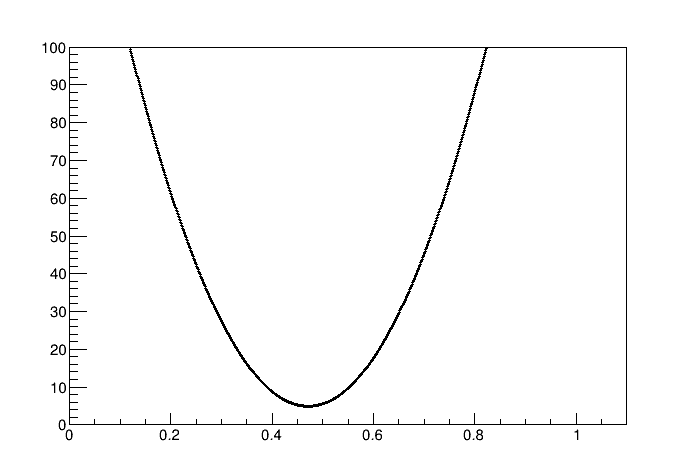

In [24]:
c2->Clear();
gchi2->GetYaxis()->SetRangeUser(0 , 100); 
gchi2->SetMarkerStyle(6);
gchi2->Draw("");
c2->SetLogy(0);
c2->Draw();

In [25]:
double y_from_graph(double *x, double *params) {
    double n = params[0]; // n 是放大系数
    return n * (grate->Eval(x[0])); // g 是 TGraph 指针，已经插值
}

In [26]:
TF1 *fitSF_0 = new TF1("fitSF_0", y_from_graph, 0, 90, 1);
fitSF_0->SetParameter(0, 0.8);
    // 执行最小卡方拟合
    fitthecross_0->Fit(fitSF_0, "Q"); // "Q" 选项意味着安静模式（无终端输出）
    double chi2 = fitSF_0->GetChisquare();
    // 获取最佳拟合参数 n 和其误差
    double SF_0_opt = fitSF_0->GetParameter(0);
    double SF_0_err = fitSF_0->GetParError(0);
cout<<"ROOT: SF_0 = "<<SF_0_opt<<'\t'<<"error="<<SF_0_err<<'\n';
cout<<"chi2="<<chi2<<'\n';

ROOT: SF_0 = 0.470809	error=0.0180329
chi2=19.6212


In [27]:
chi2_0_min=100000000;
TGraph *gchi2_6100=new TGraph();
Int_t countgchi2_6100;
for(Double_t xx=0.1;xx<=5;xx+=0.01){
    chi2_0_temp=0;
    for(Int_t ii=3;ii<9;ii++){
        chimin=0;
        /*
        for(Double_t jj=(180.-theangle_cm_0[ii]-dangle_left_0[ii]);jj<=(180.-theangle_cm_0[ii]+dangle_right_0[ii]);jj+=0.1){
            chitemp=(jj-(180.-theangle_cm_0[ii]))*(jj-(180.-theangle_cm_0[ii]))+
                (cross_0[ii]-xx*grate->Eval(jj))*(cross_0[ii]-xx*grate->Eval(jj));
            chimin+=chitemp;
        }
        */
        //chi2_0_temp+=chimin;//(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii]))*(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii]));
        chi2_0_temp+=(cross_6100[ii]-xx*grate_6100->Eval(180-theangle_cm_6100[ii]))*(cross_6100[ii]-xx*grate_6100->Eval(180-theangle_cm_6100[ii]))/(dcross_6100[ii]*dcross_6100[ii]);//(dcross_6100[ii]*dcross_6100[ii]);//(xx*grate_6100->Eval(180-theangle_cm_6100[ii]));
    }
        if(abs(abs(chi2_0_temp-1.3831)-1)<0.02)cout<<xx<<" : "<<abs(chi2_0_temp-1.3831)-1<<'\n';
        gchi2_6100->SetPoint(countgchi2_6100++,xx,chi2_0_temp);
    //cout<<xx<<'\t'<<chi2_0_temp<<'\t'<<SF_0<<'\t'<<chi2_0_min<<'\n';
    if(chi2_0_temp<chi2_0_min){
        chi2_0_min=chi2_0_temp;
        SF_6100=xx;
    }
}
cout<<"SF_6100 = "<<SF_6100<<'\t'<<"chi_min="<<chi2_0_min<<'\n';

SF_6100 = 0.1	chi_min=0


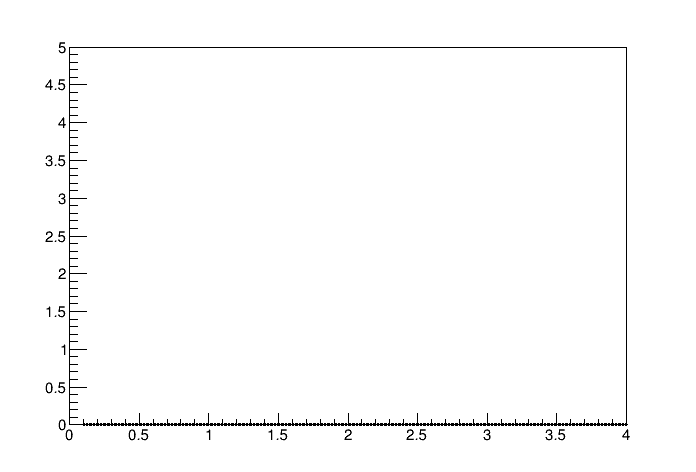

In [28]:
c2->Clear();
gchi2_6100->GetXaxis()->SetLimits(0, 4);
gchi2_6100->GetYaxis()->SetRangeUser(0 , 5); 
gchi2_6100->SetMarkerStyle(6);
gchi2_6100->Draw("");
c2->SetLogy(0);
c2->Draw();

In [29]:
double y_from_graph_6100(double *x, double *params) {
    double n = params[0]; // n 是放大系数
    return n * (grate_6100->Eval(x[0])); // g 是 TGraph 指针，已经插值
}

In [30]:
TF1 *fitSF_6100 = new TF1("fitSF_6100", y_from_graph_6100, 0, 90, 1);
fitSF_6100->SetParameter(0, 2.);
    // 执行最小卡方拟合
    fitthecross_6100->Fit(fitSF_6100, "Q"); // "Q" 选项意味着安静模式（无终端输出）
    double chi2_6100 = fitSF_6100->GetChisquare();
    // 获取最佳拟合参数 n 和其误差
    double SF_6100_opt = fitSF_6100->GetParameter(0);
    double SF_6100_err = fitSF_6100->GetParError(0);
cout<<"ROOT: SF_6100 = "<<SF_6100_opt<<'\t'<<"error="<<SF_6100_err<<'\n';
cout<<"chi2="<<chi2_6100<<'\n';

ROOT: SF_6100 = -0.0914841	error=0.0195368
chi2=0.0203838


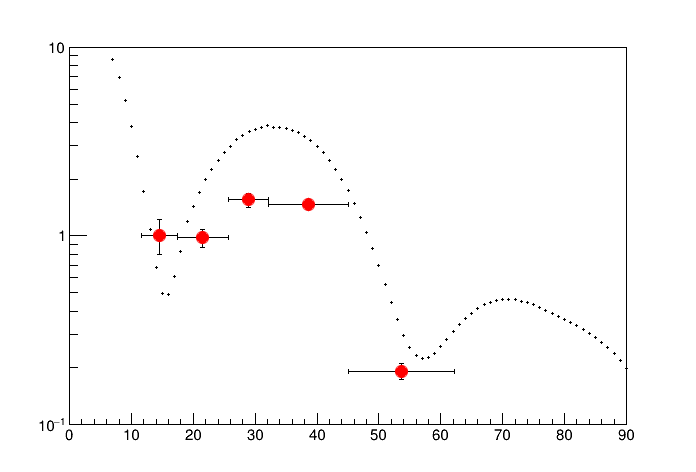

In [31]:
grate->GetXaxis()->SetLimits(0, 90);
grate->GetYaxis()->SetRangeUser(0.1 , 10); 
grate_6100->GetXaxis()->SetLimits(0, 120);
grate_6100->GetYaxis()->SetRangeUser(0 , 10); 
grate_7000->GetXaxis()->SetLimits(0, 120);
grate_7000->GetYaxis()->SetRangeUser(0 , 10); 

   c2->Clear();
grate->SetMarkerColor(1);
grate->SetMarkerStyle(6);
grate_6100->SetMarkerStyle(6);
grate_7000->SetMarkerStyle(6);
grate_6100->SetMarkerColor(4);
grate_7000->SetMarkerColor(2);
   thecross_0->SetMarkerStyle(8);
   thecross_0->SetMarkerColor(2);
   thecross_0->SetMarkerSize(1.5);
   thecross_7000->SetMarkerStyle(3);
   thecross_7000->SetMarkerColor(2);

   grate->Draw("ap");
   //grate_6100->Draw("samep");
   //grate_7000->Draw("samep");
   thecross_0->Draw("samep");
   //thecross_7000->Draw("samep");
   c2->SetLogy();
   c2->Draw();

In [32]:
Int_t npoints_rate_0=grate->GetN();
Double_t *grate_y=grate->GetY();
Double_t *grate_x=grate->GetX();
TGraph *grate_0_new = new TGraph();
for (int ii = 0; ii < npoints_rate_0; ii++) {
  grate_0_new->SetPoint(ii, grate_x[ii], SF_0*grate_y[ii]);
}
Int_t npoints_rate_6100=grate_6100->GetN();
Double_t *grate_y_6100=grate_6100->GetY();
Double_t *grate_x_6100=grate_7000->GetX();
for (int ii = 0; ii < npoints_rate_0; ii++) {
  grate_mix->SetPoint(ii, grate_x_6100[ii], SF_6100*grate_y_6100[ii]);
}

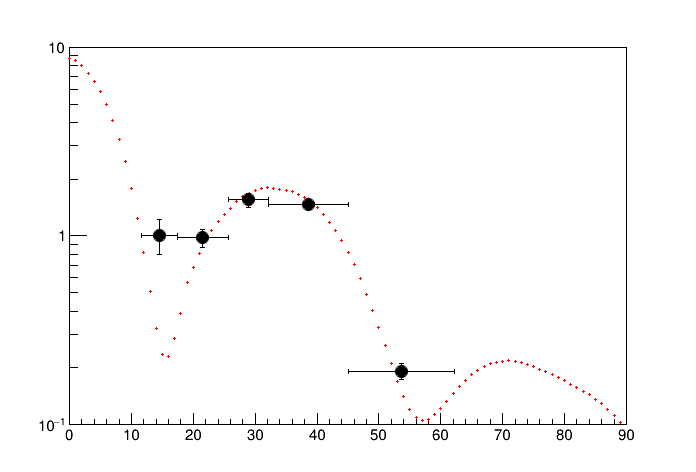

In [33]:
grate_0_new->GetXaxis()->SetLimits(0, 90);
grate_0_new->GetYaxis()->SetRangeUser(0.1 , 10); 
grate_6100->GetXaxis()->SetLimits(0, 120);
grate_6100->GetYaxis()->SetRangeUser(0 , 10); 
grate_7000->GetXaxis()->SetLimits(0, 120);
grate_7000->GetYaxis()->SetRangeUser(0 , 10); 
grate_mix->GetXaxis()->SetLimits(0, 120);
grate_mix->GetYaxis()->SetRangeUser(0 , 10); 

   c2->Clear();
grate_0_new->SetMarkerColor(2);
grate_0_new->SetMarkerStyle(6);
grate_6100->SetMarkerStyle(6);
grate_7000->SetMarkerStyle(6);
grate_6100->SetMarkerColor(4);
grate_7000->SetMarkerColor(2);
   thecross_0->SetMarkerStyle(8);
   thecross_0->SetMarkerColor(1);
   thecross_0->SetMarkerSize(1.5);
   thecross_7000->SetMarkerStyle(3);
   thecross_7000->SetMarkerColor(1);

   grate_0_new->Draw("ap");
   //grate_6100->Draw("samep");
   //grate_7000->Draw("samep");
   thecross_0->Draw("samep");
   //thecross_7000->Draw("samep");
   c2->SetLogy(1);
   c2->Draw();

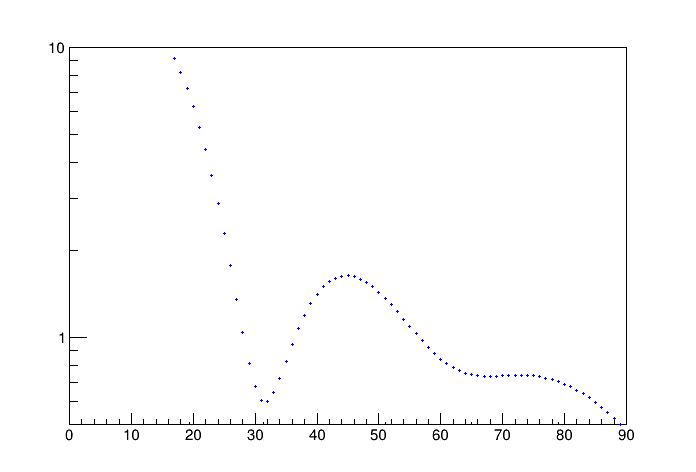

In [34]:
grate_6100->GetXaxis()->SetLimits(0, 90);
grate_6100->GetYaxis()->SetRangeUser(0.5 , 10); 

c2->Clear();
grate->SetMarkerStyle(6);
grate_6100->SetMarkerStyle(6);
grate_7000->SetMarkerStyle(6);
grate_6100->SetMarkerColor(4);
grate_7000->SetMarkerColor(2);
   thecross_0->SetMarkerStyle(3);
   thecross_0->SetMarkerColor(1);
   thecross_6100->SetMarkerStyle(8);
   thecross_6100->SetMarkerColor(1);

   //grate->Draw("ap");
   grate_6100->Draw("ap");
   //grate_7000->Draw("ap");
   //thecross_0->Draw("samep");
   //thecross_7000->Draw("samep");
   thecross_6100->Draw("samep");
   c2->Draw();

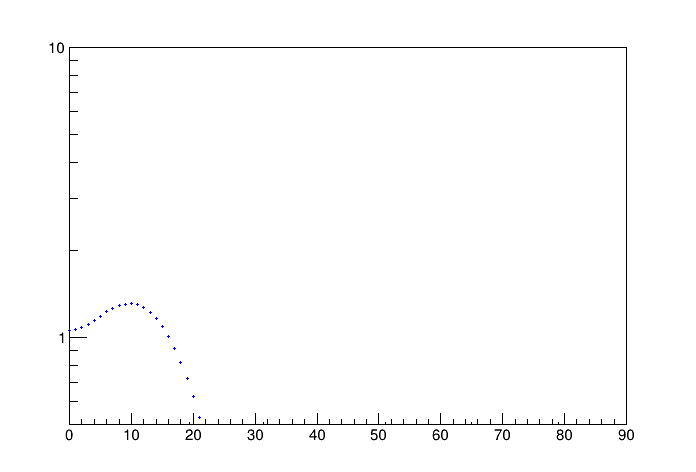

In [35]:
grate_mix->GetXaxis()->SetLimits(0, 90);
grate_mix->GetYaxis()->SetRangeUser(0.5 , 10); 

c2->Clear();
grate->SetMarkerStyle(6);
grate_6100->SetMarkerStyle(6);
grate_7000->SetMarkerStyle(6);
grate_mix->SetMarkerStyle(6);
grate_6100->SetMarkerColor(4);
grate_7000->SetMarkerColor(2);
grate_mix->SetMarkerColor(4);
   thecross_0->SetMarkerStyle(3);
   thecross_0->SetMarkerColor(1);
   thecross_6100->SetMarkerStyle(8);
   thecross_6100->SetMarkerColor(1);


   //grate->Draw("ap");
   //grate_6100->Draw("ap");
   //grate_7000->Draw("ap");
   grate_mix->Draw("ap");
   //thecross_0->Draw("samep");
   //thecross_7000->Draw("samep");
   thecross_6100->Draw("samep");
   c2->Draw();

In [36]:
   c2->Clear();
   thecross_0->SetMarkerStyle(3);
   //thecross_0->Draw("ap");
   //c2->Draw();

In [37]:
   c2->Clear();
   thecross_0->SetMarkerStyle(3);
   //thecross_0->Draw("ap");
   //c2->Draw();

In [38]:
   c2->Clear();
   E_theta_lab_1->SetNameTitle("E_theta_lab g.s","E_theta_lab g.s");
   //E_theta_lab_1->Draw("ap");
   //c2->Draw();

In [39]:
   c2->Clear();
   E_theta_lab_2->SetNameTitle("E_theta_lab Ex","E_theta_lab Ex");
   //E_theta_lab_2->Draw("ap");
   //c2->Draw();

In [40]:
   c2->Clear();
   T1E_newtheta_new_bydstar_all->SetNameTitle("E_theta_lab exp","E_theta_lab exp");
   //T1E_newtheta_new_bydstar_all->Draw("ap");
   //c2->Draw();
   cout<<npoints_all<<'\n';

1032


In [41]:
   c2->Clear();
  //h_E_exp_1->Draw();
   //c2->Draw();

In [42]:
   c2->Clear();
  // h_E_exp_2->Draw();
  // c2->Draw();

In [43]:
E_theta_lab->GetXaxis()->SetLimits(17, 49);
E_theta_lab->GetYaxis()->SetRangeUser(0 , 100); 
   c2->Clear();
   E_theta_lab->SetMarkerStyle(6);
   E_theta_lab->SetNameTitle("E_theta_lab g4","E_theta_lab g4");
 //  E_theta_lab->Draw("ap");
  // c2->Draw();
   cout<<count_E_theta_lab<<'\n';

5000


In [44]:
   c2->Clear();
   E_theta_cm_1->SetNameTitle("E_theta_cm g.s","E_theta_cm g.s");
 //  E_theta_cm_1->Draw("ap");
  // c2->Draw();
   cout<<thecount1<<'\n';

1010


In [45]:
   c2->Clear();
  // h_E_theta_cm_1->Draw("colz");
  // c2->Draw();
   cout<<thecount1<<'\n';

1010


In [46]:
   c2->Clear();
   E_theta_cm_2->SetNameTitle("E_theta_cm Ex","E_theta_cm Ex");
  // E_theta_cm_2->Draw("ap");
  // c2->Draw();
   cout<<thecount2<<'\n';

0


In [47]:
   c2->Clear();
  // h_E_theta_cm_2->Draw("colz");
  // c2->Draw();
   cout<<thecount2<<'\n';

0


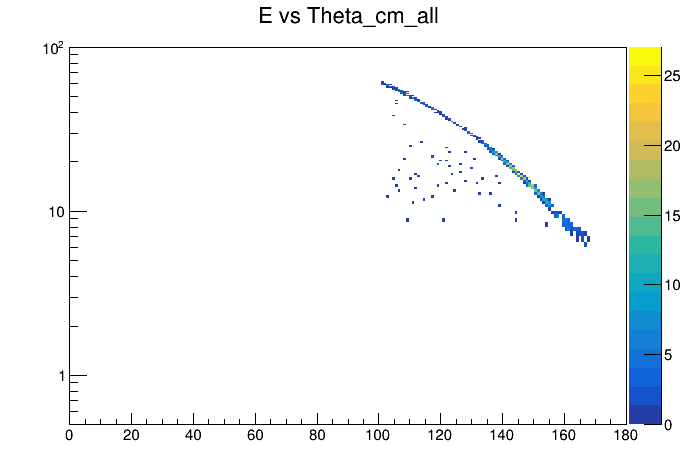

1010


In [48]:
   c2->Clear();
   h_E_theta_cm_all->Draw("colz");
   c2->Draw();
   cout<<thecount1+thecount2<<'\n';

##### 